General Assembly Python-07 Class Final Project by Adam Lang

For this Final Project we will examine 2 data sets: Definitive Healthcare USA Hospital Beds and NY.gov COVID-19 testing data. 

The goal with the Definitive Healthcare USA Hospital Beds data set is to examine the relationship of average ventilator usage and ICU beds during COVID-19 for hospitals across the USA. This will be done with graphs in Python Pandas, Matplotlib, Seaborn, and Sci-Kit Learn Linear Regression. 

The goal with the NY.gov COVID-19 data is to examine COVID-19 positive tests and cumulative tests for all NYC boroughs, Nassau County Long Island, as well as Suburban counties of Westchester and Rockland. This will be done using Python Pandas and Matplotlib. We will also perform Linear Regression analysis to look more closely at number of new positive COVID-19 tests in relation to cumulative tests, total number of tests, and cumulative number of positive tests. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
#read in the data
#This data set is of hospital bed and ventilator usage across the USA during the COVID-19 PANDEMIC. It was downloaded on 4/13/2020. 
df = pd.read_csv('Definitive_Healthcare__USA_Hospital_Beds.csv')

In [3]:
#Examine the first 5 rows 
df.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-81.510688,41.133034,3001,Western Reserve Hospital (FKA Summa Western Re...,Short Term Acute Care Hospital,1900 23rd St,NaN,Cuyahoga Falls,OH,44223.0,...,153.0,39153.0,272.0,83.0,12,12,0.0,0.430764,189,2.0
1,-81.500489,41.080189,3002,Summa Health System - Akron Campus,Short Term Acute Care Hospital,525 E Market St,NaN,Akron,OH,44304.0,...,153.0,39153.0,649.0,584.0,64,64,0.0,0.540098,65,30.0
2,-81.589456,41.014805,3003,Summa Health System - Barberton Campus,Short Term Acute Care Hospital,155 5th St Ne,NaN,Barberton,OH,44203.0,...,153.0,39153.0,271.0,158.0,12,12,0.0,0.628819,113,0.0
3,-81.532470,41.078325,3004,Akron General,Short Term Acute Care Hospital,1 Akron General Ave,NaN,Akron,OH,44307.0,...,153.0,39153.0,383.0,383.0,34,34,0.0,0.706661,0,10.0
4,-81.513552,41.096977,3005,Crystal Clinic Orthopaedic Center,Short Term Acute Care Hospital,444 N Main St,NaN,Akron,OH,44310.0,...,153.0,39153.0,94.0,59.0,10,10,0.0,0.431066,35,2.0


In [4]:
#Examine the last 5 rows 
df.tail()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
6613,-94.100377,43.634166,1996,United Hospital District,Critical Access Hospital,515 S Moore St,PO BOX 160,Blue Earth,MN,56013.0,...,43.0,27043.0,43.0,24.0,4,4,0.0,0.355594,19,1.0
6614,-93.373062,43.652500,1997,Mayo Clinic Hospital - Albert Lea,Short Term Acute Care Hospital,404 W Fountain St,NaN,Albert Lea,MN,56007.0,...,47.0,27047.0,159.0,159.0,18,18,0.0,0.251624,0,4.0
6615,-92.571967,44.560003,1998,Mayo Clinic Hospital - Red Wing (FKA Fairview ...,Short Term Acute Care Hospital,701 Hewitt Blvd,NaN,Red Wing,MN,55066.0,...,49.0,27049.0,50.0,50.0,4,4,0.0,0.256767,0,2.0
6616,-92.903294,44.486134,1999,Mayo Clinic Hospital - Cannon Falls,Critical Access Hospital,32021 County 24 Blvd,NaN,Cannon Falls,MN,55009.0,...,49.0,27049.0,15.0,15.0,5,5,0.0,0.608950,0,2.0
6617,-95.957833,45.990818,2000,Prairie Ridge Hospital and Health Services,Critical Access Hospital,1411 State Hgwy 79 East,NaN,Elbow Lake,MN,56531.0,...,51.0,27051.0,10.0,10.0,2,2,0.0,0.171781,0,0.0


In [5]:
#Examine shape of the data frame. There are 6618 rows and 23 columns. 
df.shape

(6618, 23)

In [6]:
#Examine the summary statistics of the data. We will work more with this later. 
df.describe()

,X,Y,OBJECTID,HQ_ZIP_CODE,STATE_FIPS,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
count,6600.000000,6600.000000,6618.000000,6617.000000,6593.000000,6593.000000,6593.000000,6402.000000,6327.000000,6618.000000,6618.000000,5902.000000,5905.000000,6618.000000,6572.000000
mean,-92.514324,37.558430,3309.500000,53774.163216,29.282876,94.303049,29377.178826,147.711496,128.100996,14.048353,14.048353,4.899864,0.492593,20.422182,3.547626
std,16.120051,5.692682,1910.596373,27297.847404,16.074167,106.112336,16100.018266,182.472668,161.765558,22.465995,22.465995,16.774236,0.235231,77.845651,5.463066
min,-170.685773,-14.290190,1.000000,603.000000,1.000000,1.000000,1001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000721,-1389.000000,0.000000
25%,-98.219503,33.609121,1655.250000,32216.000000,17.000000,29.000000,17031.000000,25.000000,25.000000,3.000000,3.000000,0.000000,0.301785,0.000000,0.000000
50%,-90.099936,38.279439,3309.500000,55313.000000,29.000000,69.000000,29073.000000,75.000000,65.000000,6.000000,6.000000,0.000000,0.498740,0.000000,2.000000
75%,-81.982734,41.448613,4963.750000,76380.000000,42.000000,119.000000,42101.000000,196.000000,166.000000,16.000000,16.000000,0.000000,0.675450,23.000000,4.000000
max,145.724170,71.298900,6618.000000,99929.000000,72.000000,840.000000,72153.000000,2059.000000,2753.000000,310.000000,310.000000,260.000000,1.000000,1446.000000,61.000000


# Data Cleaning

1. Missing Values 

In [7]:
#count number of nulls
null_df = pd.DataFrame(df.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values(['Count of Nulls'], ascending=False).head(14)

,Count of Nulls
Column,
HQ_ADDRESS1,6254
PEDI_ICU_BEDS,716
BED_UTILIZATION,713
NUM_STAFFED_BEDS,291
NUM_LICENSED_BEDS,216
AVG_VENTILATOR_USAGE,46
COUNTY_NAME,25
FIPS,25
CNTY_FIPS,25


In [8]:
#Total number of nulls within the dataset
df.isnull().sum().sum()

8398

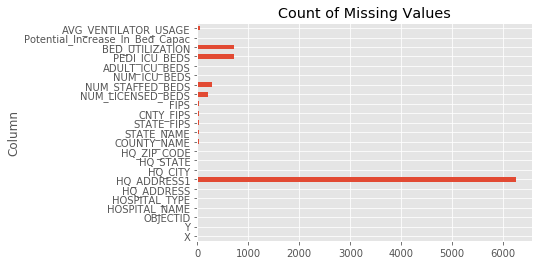

In [9]:
#Stacked bar graph: count of missing values 
df.isnull().sum().plot(kind='barh')
plt.title('Count of Missing Values');

In [10]:
#First we will drop the column (ignore it) 'HQ_ADDRESS1' since it is a secondary address column
df.drop(['HQ_ADDRESS1'],axis=1).head()

Column,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,COUNTY_NAME,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-81.510688,41.133034,3001,Western Reserve Hospital (FKA Summa Western Re...,Short Term Acute Care Hospital,1900 23rd St,Cuyahoga Falls,OH,44223.0,Summit,...,153.0,39153.0,272.0,83.0,12,12,0.0,0.430764,189,2.0
1,-81.500489,41.080189,3002,Summa Health System - Akron Campus,Short Term Acute Care Hospital,525 E Market St,Akron,OH,44304.0,Summit,...,153.0,39153.0,649.0,584.0,64,64,0.0,0.540098,65,30.0
2,-81.589456,41.014805,3003,Summa Health System - Barberton Campus,Short Term Acute Care Hospital,155 5th St Ne,Barberton,OH,44203.0,Summit,...,153.0,39153.0,271.0,158.0,12,12,0.0,0.628819,113,0.0
3,-81.532470,41.078325,3004,Akron General,Short Term Acute Care Hospital,1 Akron General Ave,Akron,OH,44307.0,Summit,...,153.0,39153.0,383.0,383.0,34,34,0.0,0.706661,0,10.0
4,-81.513552,41.096977,3005,Crystal Clinic Orthopaedic Center,Short Term Acute Care Hospital,444 N Main St,Akron,OH,44310.0,Summit,...,153.0,39153.0,94.0,59.0,10,10,0.0,0.431066,35,2.0


In [11]:
#Next let's fill in missing values
cols=['AVG_VENTILATOR_USAGE','PEDI_ICU_BEDS','BED_UTILIZATION','NUM_STAFFED_BEDS','NUM_LICENSED_BEDS']
df[cols]=df[cols].fillna(df.mode().iloc[0])


In [12]:
#Let's check the missing values. The HQ_ADDRESS1 still exists because this is the original data frame but the column is not present. 
df.isnull().sum()

Column
X                                    18
Y                                    18
OBJECTID                              0
HOSPITAL_NAME                         0
HOSPITAL_TYPE                         0
HQ_ADDRESS                            0
HQ_ADDRESS1                        6254
HQ_CITY                               0
HQ_STATE                              0
HQ_ZIP_CODE                           1
COUNTY_NAME                          25
STATE_NAME                           25
STATE_FIPS                           25
CNTY_FIPS                            25
FIPS                                 25
NUM_LICENSED_BEDS                     0
NUM_STAFFED_BEDS                      0
NUM_ICU_BEDS                          0
ADULT_ICU_BEDS                        0
PEDI_ICU_BEDS                         0
BED_UTILIZATION                       0
Potential_Increase_In_Bed_Capac       0
AVG_VENTILATOR_USAGE                  0
dtype: int64

In [13]:
#Next we want to drop the rows with the following missing values since we can't identify the geographic location
df.dropna(how='any', subset=['COUNTY_NAME','STATE_NAME','STATE_FIPS','CNTY_FIPS','FIPS'], inplace=True)

In [14]:
#Now the only remaining nulls is the column we dropped 
df.isnull().sum()

Column
X                                     0
Y                                     0
OBJECTID                              0
HOSPITAL_NAME                         0
HOSPITAL_TYPE                         0
HQ_ADDRESS                            0
HQ_ADDRESS1                        6233
HQ_CITY                               0
HQ_STATE                              0
HQ_ZIP_CODE                           0
COUNTY_NAME                           0
STATE_NAME                            0
STATE_FIPS                            0
CNTY_FIPS                             0
FIPS                                  0
NUM_LICENSED_BEDS                     0
NUM_STAFFED_BEDS                      0
NUM_ICU_BEDS                          0
ADULT_ICU_BEDS                        0
PEDI_ICU_BEDS                         0
BED_UTILIZATION                       0
Potential_Increase_In_Bed_Capac       0
AVG_VENTILATOR_USAGE                  0
dtype: int64

In [15]:
#We dropped the rows with the geographic nulls, so the row number decreased in size 
df.shape

(6593, 23)

In [16]:
df.head()

Column,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-81.510688,41.133034,3001,Western Reserve Hospital (FKA Summa Western Re...,Short Term Acute Care Hospital,1900 23rd St,NaN,Cuyahoga Falls,OH,44223.0,...,153.0,39153.0,272.0,83.0,12,12,0.0,0.430764,189,2.0
1,-81.500489,41.080189,3002,Summa Health System - Akron Campus,Short Term Acute Care Hospital,525 E Market St,NaN,Akron,OH,44304.0,...,153.0,39153.0,649.0,584.0,64,64,0.0,0.540098,65,30.0
2,-81.589456,41.014805,3003,Summa Health System - Barberton Campus,Short Term Acute Care Hospital,155 5th St Ne,NaN,Barberton,OH,44203.0,...,153.0,39153.0,271.0,158.0,12,12,0.0,0.628819,113,0.0
3,-81.532470,41.078325,3004,Akron General,Short Term Acute Care Hospital,1 Akron General Ave,NaN,Akron,OH,44307.0,...,153.0,39153.0,383.0,383.0,34,34,0.0,0.706661,0,10.0
4,-81.513552,41.096977,3005,Crystal Clinic Orthopaedic Center,Short Term Acute Care Hospital,444 N Main St,NaN,Akron,OH,44310.0,...,153.0,39153.0,94.0,59.0,10,10,0.0,0.431066,35,2.0


2. Rename Columns X, Y to longitude and latitude 

In [17]:
hospitals= df.rename(columns={'X':'Longitude','Y':'Latitude'})
hospitals.head(3)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-81.510688,41.133034,3001,Western Reserve Hospital (FKA Summa Western Re...,Short Term Acute Care Hospital,1900 23rd St,NaN,Cuyahoga Falls,OH,44223.0,...,153.0,39153.0,272.0,83.0,12,12,0.0,0.430764,189,2.0
1,-81.500489,41.080189,3002,Summa Health System - Akron Campus,Short Term Acute Care Hospital,525 E Market St,NaN,Akron,OH,44304.0,...,153.0,39153.0,649.0,584.0,64,64,0.0,0.540098,65,30.0
2,-81.589456,41.014805,3003,Summa Health System - Barberton Campus,Short Term Acute Care Hospital,155 5th St Ne,NaN,Barberton,OH,44203.0,...,153.0,39153.0,271.0,158.0,12,12,0.0,0.628819,113,0.0


3. Change data types

In [18]:
#A few data types need to be changed from float to integer.For example we can't have half a hospital bed!
hospitals.dtypes

Column
Longitude                          float64
Latitude                           float64
OBJECTID                             int64
HOSPITAL_NAME                       object
HOSPITAL_TYPE                       object
HQ_ADDRESS                          object
HQ_ADDRESS1                         object
HQ_CITY                             object
HQ_STATE                            object
HQ_ZIP_CODE                        float64
COUNTY_NAME                         object
STATE_NAME                          object
STATE_FIPS                         float64
CNTY_FIPS                          float64
FIPS                               float64
NUM_LICENSED_BEDS                  float64
NUM_STAFFED_BEDS                   float64
NUM_ICU_BEDS                         int64
ADULT_ICU_BEDS                       int64
PEDI_ICU_BEDS                      float64
BED_UTILIZATION                    float64
Potential_Increase_In_Bed_Capac      int64
AVG_VENTILATOR_USAGE               float64
dtyp

In [19]:
#We will change the following from floats to integers: 
hospitals.astype({'HQ_ZIP_CODE':'int64','NUM_LICENSED_BEDS':'int64','NUM_STAFFED_BEDS':'int64','PEDI_ICU_BEDS':'int64'}).dtypes

Column
Longitude                          float64
Latitude                           float64
OBJECTID                             int64
HOSPITAL_NAME                       object
HOSPITAL_TYPE                       object
HQ_ADDRESS                          object
HQ_ADDRESS1                         object
HQ_CITY                             object
HQ_STATE                            object
HQ_ZIP_CODE                          int64
COUNTY_NAME                         object
STATE_NAME                          object
STATE_FIPS                         float64
CNTY_FIPS                          float64
FIPS                               float64
NUM_LICENSED_BEDS                    int64
NUM_STAFFED_BEDS                     int64
NUM_ICU_BEDS                         int64
ADULT_ICU_BEDS                       int64
PEDI_ICU_BEDS                        int64
BED_UTILIZATION                    float64
Potential_Increase_In_Bed_Capac      int64
AVG_VENTILATOR_USAGE               float64
dtyp

In [20]:
hospitals.head(3)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-81.510688,41.133034,3001,Western Reserve Hospital (FKA Summa Western Re...,Short Term Acute Care Hospital,1900 23rd St,NaN,Cuyahoga Falls,OH,44223.0,...,153.0,39153.0,272.0,83.0,12,12,0.0,0.430764,189,2.0
1,-81.500489,41.080189,3002,Summa Health System - Akron Campus,Short Term Acute Care Hospital,525 E Market St,NaN,Akron,OH,44304.0,...,153.0,39153.0,649.0,584.0,64,64,0.0,0.540098,65,30.0
2,-81.589456,41.014805,3003,Summa Health System - Barberton Campus,Short Term Acute Care Hospital,155 5th St Ne,NaN,Barberton,OH,44203.0,...,153.0,39153.0,271.0,158.0,12,12,0.0,0.628819,113,0.0


4. Add new column: VENTILATOR_USE_PER_ICU_BED

In [21]:
hospitals['VENTILATOR_USE_PER_ICU_BED'] = hospitals['AVG_VENTILATOR_USAGE'] / hospitals['NUM_ICU_BEDS'] 

In [22]:
hospitals.head(3)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
0,-81.510688,41.133034,3001,Western Reserve Hospital (FKA Summa Western Re...,Short Term Acute Care Hospital,1900 23rd St,NaN,Cuyahoga Falls,OH,44223.0,...,39153.0,272.0,83.0,12,12,0.0,0.430764,189,2.0,0.166667
1,-81.500489,41.080189,3002,Summa Health System - Akron Campus,Short Term Acute Care Hospital,525 E Market St,NaN,Akron,OH,44304.0,...,39153.0,649.0,584.0,64,64,0.0,0.540098,65,30.0,0.468750
2,-81.589456,41.014805,3003,Summa Health System - Barberton Campus,Short Term Acute Care Hospital,155 5th St Ne,NaN,Barberton,OH,44203.0,...,39153.0,271.0,158.0,12,12,0.0,0.628819,113,0.0,0.000000


# Exploratory Data Analysis

1. Histograms

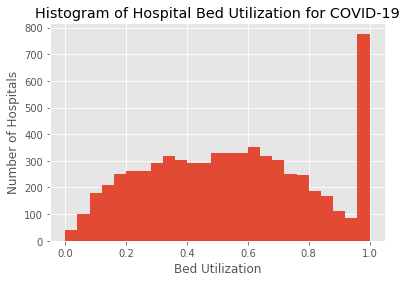

In [23]:
#Histogram of Hospital Bed Utilization for COVID-19 
#What is the name of this distribution?
plt.hist(hospitals['BED_UTILIZATION'].values,bins=25);
plt.title('Histogram of Hospital Bed Utilization for COVID-19');
plt.xlabel('Bed Utilization');
plt.ylabel('Number of Hospitals');


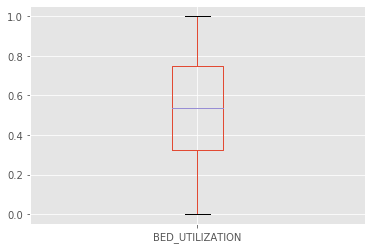

In [24]:
#Box plot of Hospital Bed Utilization for COVID-19
hospitals['BED_UTILIZATION'].plot(kind='box');

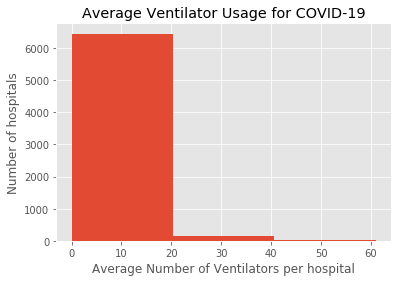

In [25]:
#Histogram of Average Ventilator Usage for COVID-19 across all hospitals in the USA. 
plt.hist(hospitals['AVG_VENTILATOR_USAGE'].values,bins=3);
plt.title('Average Ventilator Usage for COVID-19');
plt.xlabel('Average Number of Ventilators per hospital');
plt.ylabel('Number of hospitals');


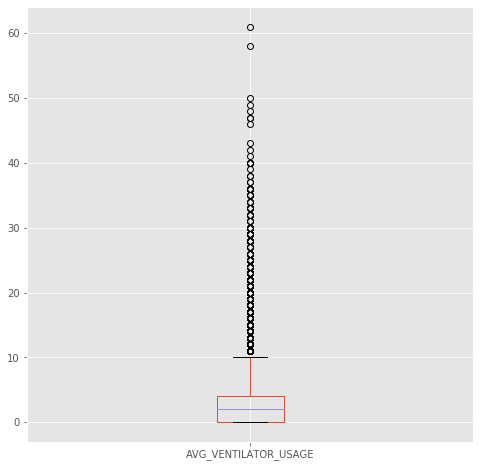

In [26]:
#Box Plot for Average Ventilator Usage for all hospitals in the USA. 
hospitals['AVG_VENTILATOR_USAGE'].plot(kind='box',figsize=(8,8));

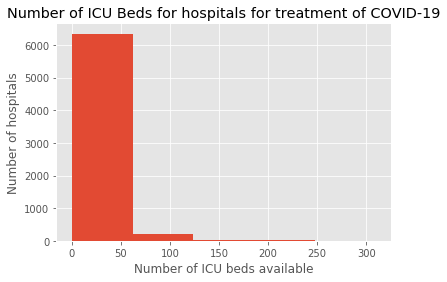

In [27]:
#Histogram of Number of ICU Beds for hospitals across the USA. ICU Beds are presumed where Ventilators are used. 
plt.hist(hospitals['NUM_ICU_BEDS'].values,bins=5);
plt.title('Number of ICU Beds for hospitals for treatment of COVID-19');
plt.xlabel('Number of ICU beds available');
plt.ylabel('Number of hospitals');

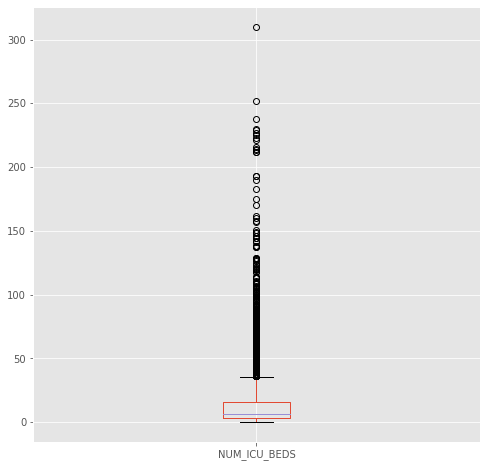

In [28]:
#Box Plot for Number of ICU Beds for all hospitals in the USA. 
hospitals['NUM_ICU_BEDS'].plot(kind='box',figsize=(8,8));

2. Create subdata frames: Let's look at NY (highest cases/deaths), CA (one of highest death rates), MN (middle of the pack), AK (least amount), and the Veterans Administration Hospitals (VA hospitals). 

NY Data Frame

In [29]:
#Create subdata frame for NY
NY=hospitals[hospitals['HQ_STATE'] == 'NY']
NY.head(10)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
1570,-73.748635,42.674080,2571,Samaritan Hospital - Albany Memorial Campus (F...,Short Term Acute Care Hospital,600 Northern Blvd,NaN,Albany,NY,12204.0,...,36001.0,165.0,73.0,16,16,0.0,0.243498,92,2.0,0.125000
1571,-73.776426,42.653221,2572,Albany Medical Center,Short Term Acute Care Hospital,43 New Scotland Ave,NaN,Albany,NY,12208.0,...,36001.0,748.0,747.0,65,65,60.0,0.771932,1,19.0,0.292308
1572,-73.803718,42.655833,2573,St Peters Hospital,Short Term Acute Care Hospital,315 S Manning Blvd,NaN,Albany,NY,12208.0,...,36001.0,442.0,482.0,33,33,15.0,0.759143,-40,18.0,0.545455
1573,-77.950559,42.122418,2574,Jones Memorial Hospital,Short Term Acute Care Hospital,191 N Main St,NaN,Wellsville,NY,14895.0,...,36003.0,49.0,49.0,6,6,0.0,0.369038,0,2.0,0.333333
1574,-73.923644,40.817510,2575,NYC Health and Hospitals - Lincoln (FKA Lincol...,Short Term Acute Care Hospital,234 E 149th St,NaN,Bronx,NY,10451.0,...,36005.0,362.0,287.0,38,38,20.0,0.763839,75,8.0,0.210526
1575,-73.846372,40.854722,2576,NYC Health and Hospitals - Jacobi (FKA Jacobi ...,Short Term Acute Care Hospital,1400 Pelham Pkwy S,NaN,Bronx,NY,10461.0,...,36005.0,457.0,326.0,40,40,25.0,0.762467,131,7.0,0.175000
1576,-73.902822,40.831375,2577,BronxCare Hospital Center - Fulton Campus,Short Term Acute Care Hospital,1276 Fulton Ave,NaN,Bronx,NY,10456.0,...,36005.0,170.0,460.0,31,31,40.0,0.760351,-290,13.0,0.419355
1577,-73.881049,40.880414,2578,NYC Health and Hospitals - North Central Bronx...,Short Term Acute Care Hospital,3424 Kossuth Ave,NaN,Bronx,NY,10467.0,...,36005.0,213.0,130.0,20,20,12.0,0.448388,83,2.0,0.100000
1578,-73.890391,40.853914,2579,St Barnabas Hospital,Short Term Acute Care Hospital,4422 3rd Ave,NaN,Bronx,NY,10457.0,...,36005.0,422.0,283.0,26,26,15.0,0.598325,139,8.0,0.307692
1579,-75.936122,42.091093,2580,Our Lady of Lourdes Memorial Hospital (AKA Asc...,Short Term Acute Care Hospital,169 Riverside Dr,NaN,Binghamton,NY,13905.0,...,36007.0,242.0,161.0,10,10,0.0,0.682890,81,4.0,0.400000


Average Ventilator Usage for NY: Top 5 hospitals

In [30]:
NY.sort_values(by='AVG_VENTILATOR_USAGE',ascending=False).head(5)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
3313,-73.954258,40.764285,5696,NewYork-Presbyterian/Weill Cornell Medical Center,Short Term Acute Care Hospital,525 E 68th St,NaN,New York,NY,10065.0,...,36061.0,862.0,862.0,214,214,210.0,0.816436,0,49.0,0.228972
3207,-73.879488,40.880785,5590,Montefiore Hospital - Moses Campus,Short Term Acute Care Hospital,111 E 210th St,NaN,Bronx,NY,10467.0,...,36005.0,816.0,1458.0,86,86,50.0,0.891434,-642,43.0,0.500000
1618,-73.998477,40.639404,2619,Maimonides Medical Center,Short Term Acute Care Hospital,4802 10th Ave,NaN,Brooklyn,NY,11219.0,...,36047.0,711.0,641.0,40,40,31.0,0.885295,70,38.0,0.950000
1646,-73.953689,40.789990,2647,Mount Sinai Medical Center (AKA the Mount Sina...,Short Term Acute Care Hospital,1 Gustave L Levy Pl,NaN,New York,NY,10029.0,...,36061.0,1134.0,1067.0,75,75,35.0,0.865111,67,37.0,0.493333
1651,-73.974332,40.742068,2652,Tisch Hospital,Short Term Acute Care Hospital,550 1st Ave,NaN,New York,NY,10016.0,...,36061.0,844.0,725.0,212,212,90.0,0.790443,119,36.0,0.169811


NY Top 5 hospitals with most number of ICU beds 

In [31]:
NY.sort_values(by='NUM_ICU_BEDS',ascending=False).head(5)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
3313,-73.954258,40.764285,5696,NewYork-Presbyterian/Weill Cornell Medical Center,Short Term Acute Care Hospital,525 E 68th St,NaN,New York,NY,10065.0,...,36061.0,862.0,862.0,214,214,210.0,0.816436,0,49.0,0.228972
1651,-73.974332,40.742068,2652,Tisch Hospital,Short Term Acute Care Hospital,550 1st Ave,NaN,New York,NY,10016.0,...,36061.0,844.0,725.0,212,212,90.0,0.790443,119,36.0,0.169811
1632,-77.625554,43.121863,2633,Strong Memorial Hospital,Short Term Acute Care Hospital,601 Elmwood Ave,NaN,Rochester,NY,14642.0,...,36055.0,886.0,739.0,127,127,100.0,0.968347,147,19.0,0.149606
1597,-78.865656,42.900651,2598,Buffalo General Medical Center (FKA Buffalo Ge...,Short Term Acute Care Hospital,100 High St,NaN,Buffalo,NY,14203.0,...,36029.0,484.0,377.0,101,101,74.0,0.767551,107,16.0,0.158416
1636,-73.701628,40.777879,2637,North Shore University Hospital,Short Term Acute Care Hospital,300 Community Dr,NaN,Manhasset,NY,11030.0,...,36059.0,764.0,764.0,87,87,51.0,0.968457,0,35.0,0.402299


NY Comparison: Number of ICU Beds, Bed Utilization, and Average Ventilator Usage

In [32]:
#Variables of interest
NY2=NY.describe()[['AVG_VENTILATOR_USAGE','BED_UTILIZATION','NUM_ICU_BEDS',]]
NY2.T

,count,mean,std,min,25%,50%,75%,max
Column,,,,,,,,
AVG_VENTILATOR_USAGE,238.0,5.710084,8.360798,0.000000,0.000000,2.000000,7.00000,49.0
BED_UTILIZATION,238.0,0.697877,0.244032,0.028082,0.514002,0.726552,0.91426,1.0
NUM_ICU_BEDS,238.0,18.071429,26.814395,0.000000,3.000000,10.000000,24.00000,214.0


MN DataFrame

In [33]:
MN=hospitals[hospitals['HQ_STATE'] == 'MN']
MN.head(5)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
1000,-93.261940,44.956681,2001,Childrens Hospitals and Clinics of Minnesota -...,Childrens Hospital,2525 Chicago Ave South,NaN,Minneapolis,MN,55404.0,...,27053.0,279.0,414.0,42,42,196.0,0.763482,-135,7.0,0.166667
1001,-93.262403,44.972095,2002,Hennepin County Medical Center (AKA Hennepin H...,Short Term Acute Care Hospital,701 Park Ave,NaN,Minneapolis,MN,55415.0,...,27053.0,894.0,330.0,65,65,30.0,0.678857,564,16.0,0.246154
1002,-93.205765,44.901563,2003,Minneapolis VA Health Care System,VA Hospital,1 Veterans Dr,NaN,Minneapolis,MN,55417.0,...,27053.0,25.0,25.0,0,0,0.0,1.000000,0,0.0,NaN
1003,-93.262017,44.952562,2004,Abbott Northwestern Hospital,Short Term Acute Care Hospital,800 E 28th St,NaN,Minneapolis,MN,55407.0,...,27053.0,972.0,599.0,30,30,0.0,0.718005,373,12.0,0.400000
1004,-93.361833,44.929624,2005,Methodist Hospital,Short Term Acute Care Hospital,6500 Excelsior Blvd,NaN,St Louis Park,MN,55426.0,...,27053.0,426.0,361.0,22,22,0.0,0.599396,65,13.0,0.590909


Average Ventilator Usage for MN: Top 3 hospitals

In [34]:
MN.sort_values(by='AVG_VENTILATOR_USAGE',ascending=False).head(3)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
1042,-92.481590,44.020866,2043,Mayo Clinic Hospital - Saint Marys Campus,Short Term Acute Care Hospital,1216 2nd St Sw,NaN,Rochester,MN,55902.0,...,27109.0,2059.0,1115.0,212,212,0.0,0.734428,944,61.0,0.287736
1072,-94.169205,45.575359,2073,St Cloud Hospital,Short Term Acute Care Hospital,1406 6th Ave N,NaN,Saint Cloud,MN,56303.0,...,27145.0,489.0,457.0,42,42,30.0,0.681466,32,20.0,0.476190
1068,-92.096461,46.793750,2069,Essentia Health - St Marys Medical Center,Short Term Acute Care Hospital,407 E 3rd St,NaN,Duluth,MN,55805.0,...,27137.0,380.0,307.0,44,44,18.0,0.769033,73,17.0,0.386364


MN Top 3 hospitals with most number of ICU beds

In [35]:
MN.sort_values(by='NUM_ICU_BEDS',ascending=False).head(3)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
1042,-92.481590,44.020866,2043,Mayo Clinic Hospital - Saint Marys Campus,Short Term Acute Care Hospital,1216 2nd St Sw,NaN,Rochester,MN,55902.0,...,27109.0,2059.0,1115.0,212,212,0.0,0.734428,944,61.0,0.287736
3273,-93.237108,44.967806,5656,M Health Fairview University of Minnesota Maso...,Childrens Hospital,2450 Riverside Ave,NaN,Minneapolis,MN,55454.0,...,27053.0,1700.0,254.0,97,97,0.0,1.000000,1446,0.0,0.000000
1001,-93.262403,44.972095,2002,Hennepin County Medical Center (AKA Hennepin H...,Short Term Acute Care Hospital,701 Park Ave,NaN,Minneapolis,MN,55415.0,...,27053.0,894.0,330.0,65,65,30.0,0.678857,564,16.0,0.246154


MN Comparison: Number of ICU Beds, Bed Utilization, and Average Ventilator Usage

In [36]:
MN2=MN.describe()[['AVG_VENTILATOR_USAGE','BED_UTILIZATION','NUM_ICU_BEDS']]
MN2.T

,count,mean,std,min,25%,50%,75%,max
Column,,,,,,,,
AVG_VENTILATOR_USAGE,148.0,2.479730,5.890693,0.000000,0.000000,1.000000,2.000000,61.0
BED_UTILIZATION,148.0,0.418998,0.265469,0.002358,0.207491,0.359836,0.601099,1.0
NUM_ICU_BEDS,148.0,10.695946,21.625967,0.000000,3.000000,4.000000,9.250000,212.0


AK Data Frame

In [37]:
AK=hospitals[hospitals['HQ_STATE'] == 'AK']
AK.head(10)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
2285,-149.744364,61.232717,6286,Alaska VA Healthcare System,VA Hospital,1201 N Muldoon Rd,NaN,Anchorage,AK,99504.0,...,2020.0,25.0,25.0,0,0,0.0,1.000000,0,0.0,NaN
2482,-149.809751,61.205580,6483,Chris Kyle Patriots Hospital,Short Term Acute Care Hospital,1650 Bragaw St,NaN,Anchorage,AK,99508.0,...,2020.0,36.0,56.0,10,10,0.0,1.000000,-20,0.0,0.000000
2633,-145.751500,60.550100,5016,Cordova Community Medical Center,Critical Access Hospital,602 Chase Ave,NaN,Cordova,AK,99574.0,...,2261.0,13.0,13.0,2,2,0.0,0.214963,0,0.0,0.000000
2693,-149.829362,61.185247,5076,Alaska Psychiatric Institute,Psychiatric Hospital,3700 Piper St,NaN,Anchorage,AK,99508.0,...,2020.0,80.0,80.0,0,0,0.0,0.500240,0,0.0,NaN
3009,-132.955462,56.812869,5392,Petersburg Medical Center,Critical Access Hospital,103 Fram St,Suite 589,Petersburg,AK,99833.0,...,2195.0,12.0,12.0,2,2,0.0,0.268265,0,0.0,0.000000
3109,-149.833529,61.207888,5492,North Star Behavioral Health (FKA North Star H...,Psychiatric Hospital,2530 Debarr Rd,NaN,Anchorage,AK,99508.0,...,2020.0,74.0,25.0,0,0,0.0,1.000000,74,0.0,NaN
3353,-156.728600,71.298900,5736,Samuel Simmonds Memorial Hospital,Critical Access Hospital,7000 Uula Street,NaN,Barrow,AK,99723.0,...,2185.0,10.0,20.0,3,3,0.0,0.066257,-10,1.0,0.333333
3415,-147.677255,64.827780,5798,Bassett Army Community Hospital,Department of Defense Hospital,4076 Neely Rd,NaN,Fort Wainwright,AK,99703.0,...,2090.0,23.0,23.0,0,0,0.0,1.000000,0,0.0,NaN
3432,-149.811253,61.253635,5815,673d Medical Group - Joint Base Elmendorf-Rich...,Department of Defense Hospital,5955 Zeamer Ave,NaN,Elmendorf Afb,AK,99506.0,...,2020.0,55.0,55.0,0,0,0.0,1.000000,0,0.0,NaN
3541,-162.593800,66.894100,5924,Maniilaq Health Center,Critical Access Hospital,436 5th Ave,NaN,Kotzebue,AK,99752.0,...,2188.0,17.0,17.0,3,3,0.0,0.233360,0,0.0,0.000000


Average Ventilator Usage for AK: Top 3 hospitals

In [38]:
AK.sort_values(by='AVG_VENTILATOR_USAGE',ascending=False).head(3)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
3721,-149.816914,61.187905,104,Providence Alaska Medical Center,Short Term Acute Care Hospital,3200 Providence Dr,NaN,Anchorage,AK,99508.0,...,2020.0,401.0,391.0,46,46,66.0,0.740093,10,11.0,0.239130
3722,-149.828733,61.210693,105,Alaska Regional Hospital,Short Term Acute Care Hospital,2801 Debarr Rd,NaN,Anchorage,AK,99508.0,...,2020.0,250.0,164.0,14,14,10.0,0.565169,86,4.0,0.285714
3723,-149.799967,61.182965,106,Alaska Native Medical Center,Short Term Acute Care Hospital,4315 Diplomacy Dr,NaN,Anchorage,AK,99508.0,...,2020.0,150.0,174.0,30,30,0.0,0.608051,-24,4.0,0.133333


AK Comparison: Number of ICU Beds, Bed Utilization, and Average Ventilator Usage

In [39]:
AK2=AK.describe()[['AVG_VENTILATOR_USAGE','BED_UTILIZATION','NUM_ICU_BEDS']]
AK2.T

,count,mean,std,min,25%,50%,75%,max
Column,,,,,,,,
AVG_VENTILATOR_USAGE,28.0,1.464286,2.219145,0.000000,0.000000,1.000000,2.000000,11.0
BED_UTILIZATION,28.0,0.491074,0.293627,0.066257,0.259539,0.388965,0.641933,1.0
NUM_ICU_BEDS,28.0,6.892857,9.990141,0.000000,1.750000,3.500000,9.000000,46.0


CA Data Frame

In [40]:
CA=hospitals[hospitals['HQ_STATE'] == 'CA']
CA.head(10)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
2013,-122.020000,38.430000,6014,California Medical Facility,Short Term Acute Care Hospital,1600 California Dr,NaN,Vacaville,CA,95696.0,...,6095.0,518.0,64.0,11,11,0.0,1.000000,454,0.0,0.000000
2014,-120.670100,35.283900,6015,California Mens Colony (AKA CMC),Short Term Acute Care Hospital,Colony Dr,NaN,San Luis Obispo,CA,93409.0,...,6079.0,50.0,50.0,9,9,0.0,1.000000,0,0.0,0.000000
2045,-118.539784,34.179477,6046,Tarzana Treatment Centers,Psychiatric Hospital,18646 Oxnard St,NaN,Tarzana,CA,91356.0,...,6037.0,60.0,4.0,0,0,0.0,0.888356,56,0.0,NaN
2065,-121.974401,37.552424,6066,Kaiser Permanente Fremont Medical Center,Short Term Acute Care Hospital,39400 Paseo Padre Pkwy,NaN,Fremont,CA,94538.0,...,6001.0,100.0,106.0,10,10,0.0,0.426742,-6,2.0,0.200000
2123,-120.990769,37.643479,6124,Central Valley Specialty Hospital,Long Term Acute Care Hospital,730 17th St,NaN,Modesto,CA,95354.0,...,6099.0,96.0,96.0,15,15,0.0,0.760645,0,5.0,0.333333
2129,-121.184844,37.894728,6130,California Health Care Facility - Stockton (FK...,Psychiatric Hospital,7707 Austin Rd,NaN,Stockton,CA,95215.0,...,6077.0,972.0,25.0,0,0,0.0,1.000000,972,0.0,NaN
2138,-122.390208,37.766456,6139,UCSF Medical Center at Mission Bay,Short Term Acute Care Hospital,1825 4th St,NaN,San Francisco,CA,94158.0,...,6075.0,289.0,289.0,51,51,0.0,1.000000,0,0.0,0.000000
2161,-121.287662,37.966741,6162,San Joaquin County Mental Health Services Psyc...,Psychiatric Hospital,1212 N California St,NaN,Stockton,CA,95202.0,...,6077.0,40.0,40.0,0,0,0.0,1.000000,0,0.0,NaN
2162,-121.354610,38.633480,6163,American River Psychiatric Health Facility,Psychiatric Hospital,4741 Engle Rd,NaN,Carmichael,CA,95608.0,...,6067.0,53.0,53.0,0,0,0.0,1.000000,0,0.0,NaN
2163,-121.993790,36.983478,6164,Telecare Santa Cruz County Psychiatric Health ...,Psychiatric Hospital,2250 Soquel Ave,Suite 150,Santa Cruz,CA,95062.0,...,6087.0,16.0,16.0,0,0,0.0,0.938014,0,0.0,NaN


CA Comparison: Number of ICU Beds, Bed Utilization, and Average Ventilator Usage

In [41]:
CA2=CA.describe()[['AVG_VENTILATOR_USAGE','BED_UTILIZATION','NUM_ICU_BEDS',]]
CA2.T

,count,mean,std,min,25%,50%,75%,max
Column,,,,,,,,
AVG_VENTILATOR_USAGE,468.0,4.243590,4.765200,0.000000,1.000000,3.000000,6.000000,32.0
BED_UTILIZATION,468.0,0.604897,0.252343,0.032785,0.422386,0.579075,0.799669,1.0
NUM_ICU_BEDS,468.0,18.630342,24.000850,0.000000,4.000000,12.000000,24.000000,225.0


VA Hospital Data Frame

In [42]:
VAhosp=hospitals[hospitals['HOSPITAL_TYPE']=='VA Hospital']
VAhosp.head()

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
76,-95.414440,35.764735,3077,Eastern Oklahoma VA Health Care System - Jack ...,VA Hospital,1011 Honor Heights Dr,NaN,Muskogee,OK,74401.0,...,40101.0,25.0,25.0,0,0,0.0,1.0,0,1.0,inf
86,-97.496385,35.482908,3087,Oklahoma City VA Health Care System,VA Hospital,921 Ne 13th St,NaN,Oklahoma City,OK,73104.0,...,40109.0,25.0,25.0,1,1,0.0,1.0,0,2.0,2.0
172,-122.684116,45.496277,3173,Portland VA Medical Center - Main Campus,VA Hospital,3710 Sw Us Veterans Hospital Rd,NaN,Portland,OR,97239.0,...,41051.0,231.0,231.0,5,5,0.0,1.0,0,2.0,0.4
212,-78.397749,40.489221,3213,James E Van Zandt VA Medical Center (AKA Altoo...,VA Hospital,2907 Pleasant Valley Blvd,NaN,Altoona,PA,16602.0,...,42013.0,25.0,25.0,0,0,0.0,1.0,0,1.0,inf
233,-75.795951,39.998126,3234,Coatesville VA Medical Center,VA Hospital,1400 Blackhorse Hill Rd,NaN,Coatesville,PA,19320.0,...,42029.0,25.0,25.0,1,1,0.0,1.0,0,1.0,1.0


Average Ventilator Usage for VA Hospitals: Top 5 hospitals

In [43]:
VAhosp.sort_values(by='AVG_VENTILATOR_USAGE',ascending=False).head(5)

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
6580,-83.059202,42.355710,1963,John D Dingell VA Medical Center,VA Hospital,4646 John R St,NaN,Detroit,MI,48201.0,...,26163.0,62.0,62.0,1,1,0.0,1.0,0,2.0,2.000000
3212,-71.171507,42.274679,5595,VA Boston Healthcare System - West Roxbury Cam...,VA Hospital,1400 Vfw Pkwy,NaN,West Roxbury,MA,2132.0,...,25025.0,25.0,25.0,3,3,0.0,1.0,0,2.0,0.666667
3998,-118.452619,34.052695,381,VA Greater Los Angeles Healthcare System - Wes...,VA Hospital,11301 Wilshire Blvd,NaN,Los Angeles,CA,90073.0,...,6037.0,25.0,25.0,1,1,0.0,1.0,0,2.0,2.000000
4075,-121.295515,38.573060,458,VA Northern California Health Care System Vall...,VA Hospital,10535 Hospital Way,NaN,Mather,CA,95655.0,...,6067.0,25.0,25.0,1,1,0.0,1.0,0,2.0,2.000000
4126,-122.505051,37.782007,509,San Francisco VA Health Care System - San Fran...,VA Hospital,4150 Clement St,NaN,San Francisco,CA,94121.0,...,6075.0,124.0,124.0,1,1,0.0,1.0,0,2.0,2.000000


VA Hospital Comparison: Number of ICU Beds, Bed Utilization, and Average Ventilator Usage

In [44]:
VAhosp2=VAhosp.describe()[['AVG_VENTILATOR_USAGE','BED_UTILIZATION','NUM_ICU_BEDS',]]
VAhosp2.T

,count,mean,std,min,25%,50%,75%,max
Column,,,,,,,,
AVG_VENTILATOR_USAGE,160.0,1.0875,0.885860,0.0,0.0,1.0,2.00,2.0
BED_UTILIZATION,160.0,1.0000,0.000000,1.0,1.0,1.0,1.00,1.0
NUM_ICU_BEDS,160.0,0.9250,1.025155,0.0,0.0,1.0,1.25,5.0


3. Descriptive Statistics of Ventilator Usage for subdata frames

In [45]:
#Ventilator total use by state
NY['AVG_VENTILATOR_USAGE'].sum()

1359.0

In [46]:
MN['AVG_VENTILATOR_USAGE'].sum()

367.0

In [47]:
AK['AVG_VENTILATOR_USAGE'].sum()

41.0

In [48]:
CA['AVG_VENTILATOR_USAGE'].sum()

1986.0

In [49]:
VAhosp['AVG_VENTILATOR_USAGE'].sum()

174.0

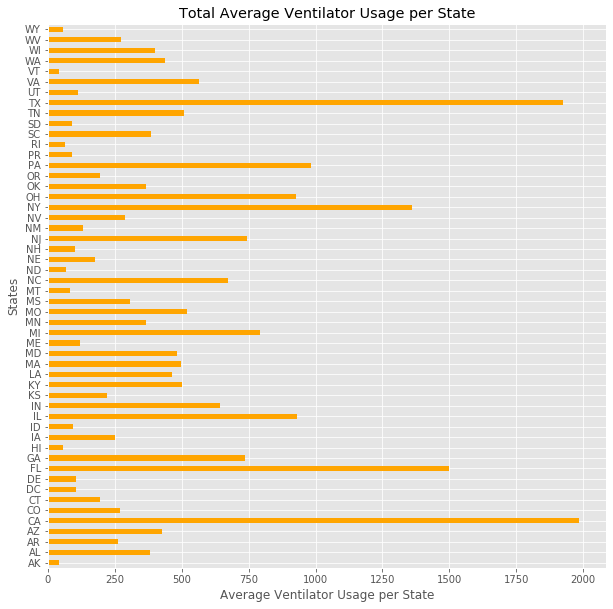

In [50]:
#Average ventilator usage for each state
hospitals.groupby('HQ_STATE').agg('sum')['AVG_VENTILATOR_USAGE'].plot(kind='barh',color='orange',figsize=(10,10));
#Label graph
plt.title('Total Average Ventilator Usage per State');
plt.xlabel('Average Ventilator Usage per State');
plt.ylabel('States');

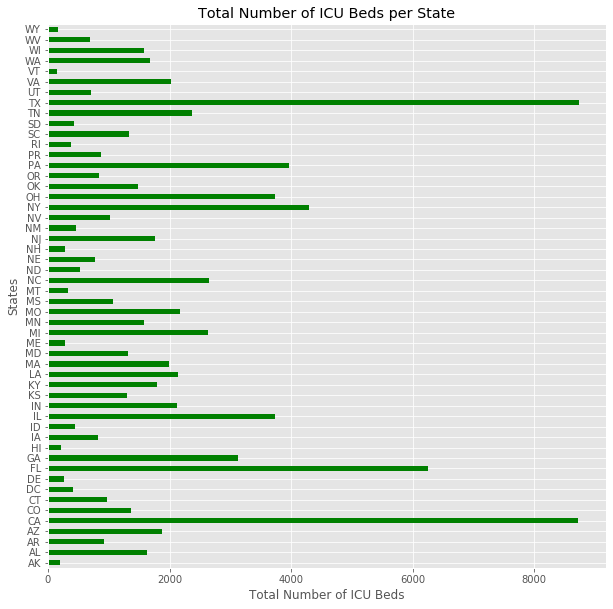

In [51]:
#Number of ICU beds per state
hospitals.groupby('HQ_STATE').agg('sum')['NUM_ICU_BEDS'].plot(kind='barh',color='green',figsize=(10,10));
#Label graph
plt.title('Total Number of ICU Beds per State');
plt.xlabel('Total Number of ICU Beds');
plt.ylabel('States');

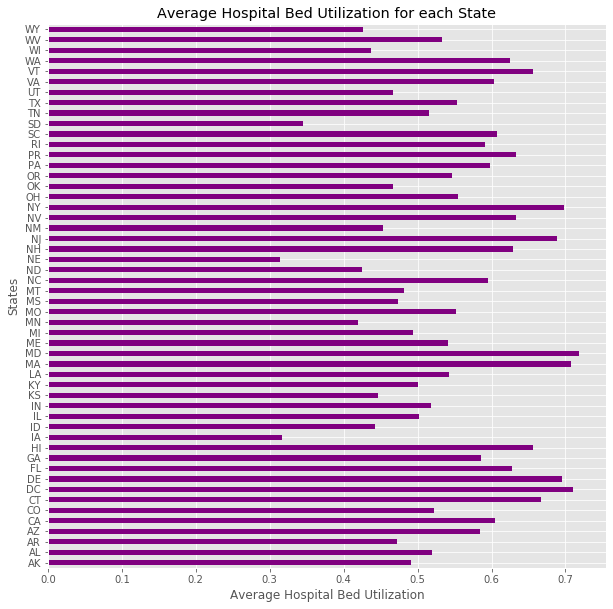

In [52]:
#Mean Bed Utilization for each state
hospitals.groupby('HQ_STATE').agg('mean')['BED_UTILIZATION'].plot(kind='barh',color='purple',figsize=(10,10));plt.title('NYC and Long Island Cumulative Number of Tests vs. Cumulative Number of Positives');
#Label Graph
plt.title('Average Hospital Bed Utilization for each State');
plt.xlabel('Average Hospital Bed Utilization');
plt.ylabel('States');

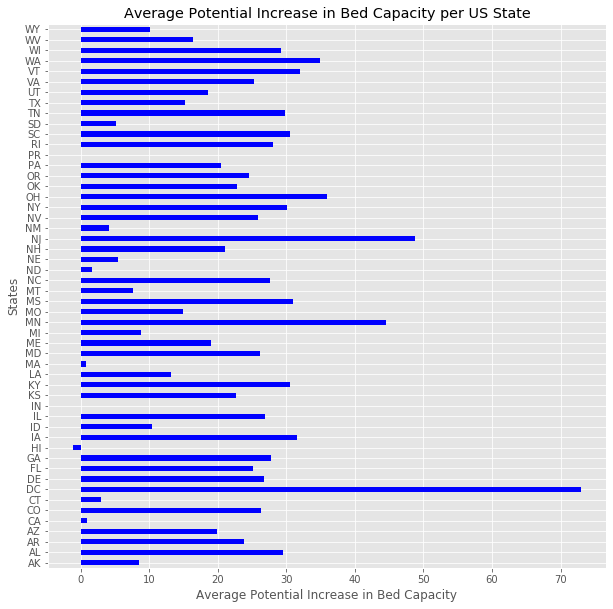

In [53]:
#Mean increase in bed capacity for each state
hospitals.groupby('HQ_STATE').agg('mean')['Potential_Increase_In_Bed_Capac'].plot(kind='barh',color='blue',figsize=(10,10));
#Label graph
plt.title('Average Potential Increase in Bed Capacity per US State');
plt.xlabel('Average Potential Increase in Bed Capacity');
plt.ylabel('States');

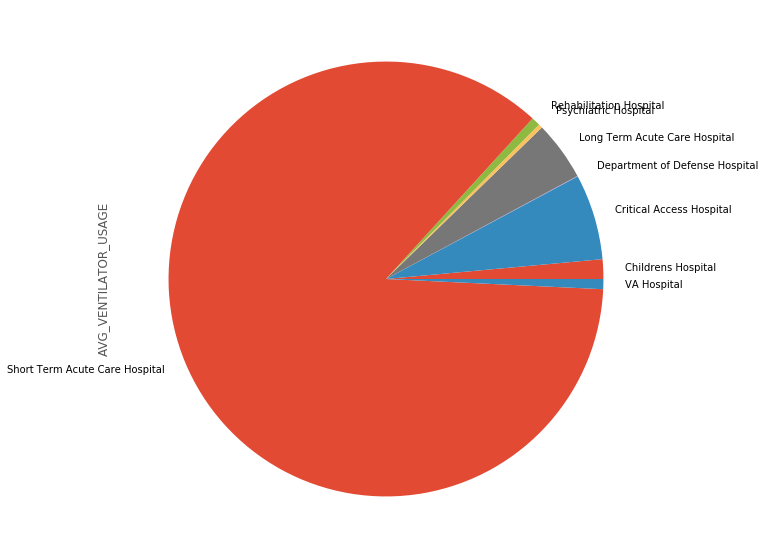

In [54]:
#Average ventilator usage for each hospital type in USA in pie chart
hospitals.groupby('HOSPITAL_TYPE').agg('sum')['AVG_VENTILATOR_USAGE'].plot(kind='pie',figsize=(10,10));

In [55]:
#Hospital in the country with most ventilator usage
hospitals[hospitals.AVG_VENTILATOR_USAGE >= 61.000000]

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
1042,-92.48159,44.020866,2043,Mayo Clinic Hospital - Saint Marys Campus,Short Term Acute Care Hospital,1216 2nd St Sw,NaN,Rochester,MN,55902.0,...,27109.0,2059.0,1115.0,212,212,0.0,0.734428,944,61.0,0.287736


In [56]:
#Hospital in USA with most potential increase in bed capacity
hospitals[hospitals.Potential_Increase_In_Bed_Capac >= 1446.000000]

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
3273,-93.237108,44.967806,5656,M Health Fairview University of Minnesota Maso...,Childrens Hospital,2450 Riverside Ave,NaN,Minneapolis,MN,55454.0,...,27053.0,1700.0,254.0,97,97,0.0,1.0,1446,0.0,0.0


In [57]:
#Hospital in USA with most number of ICU beds
hospitals[hospitals.NUM_ICU_BEDS >= 310.000000]

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
2289,-87.669749,41.874609,6290,Rush University Childrens Hospital (FKA Rush C...,Childrens Hospital,1653 W Congress Pkwy,NaN,Chicago,IL,60612.0,...,17031.0,807.0,807.0,310,310,0.0,1.0,0,3.0,0.009677


In [58]:
#Hospital in the USA with most number of staffed beds available
hospitals[hospitals.NUM_STAFFED_BEDS >= 2753.000000]

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
4421,-81.369541,28.57447,804,AdventHealth Orlando (FKA Florida Hospital Orl...,Short Term Acute Care Hospital,601 E Rollins St,NaN,Orlando,FL,32803.0,...,12095.0,1364.0,2753.0,221,221,118.0,0.635357,-1389,30.0,0.135747


4. Data Visualizations: Scatter plots of variable vs. average ventilator usage

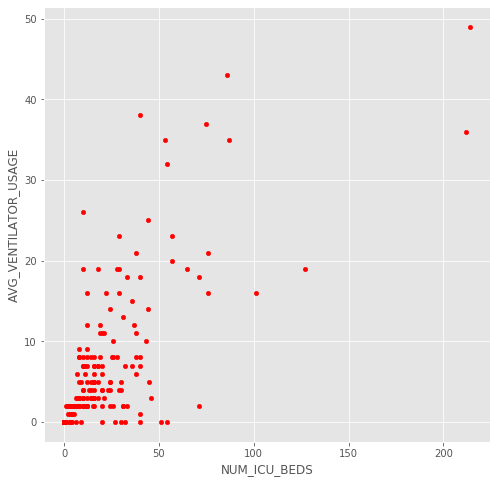

In [59]:
NY.plot(kind='scatter',x='NUM_ICU_BEDS',y='AVG_VENTILATOR_USAGE',
        color='red',figsize=(8,8));

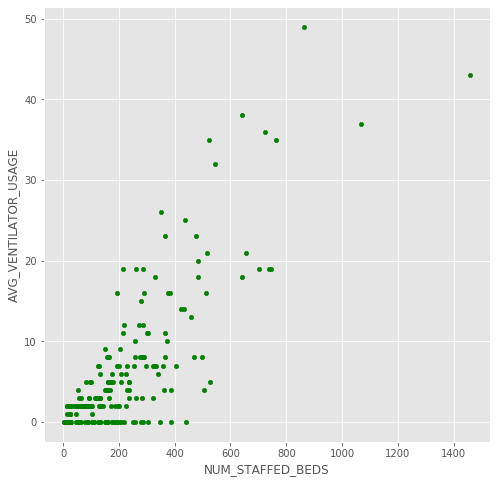

In [60]:
NY.plot(kind='scatter',x='NUM_STAFFED_BEDS', y='AVG_VENTILATOR_USAGE',
        color='green',figsize=(8,8));

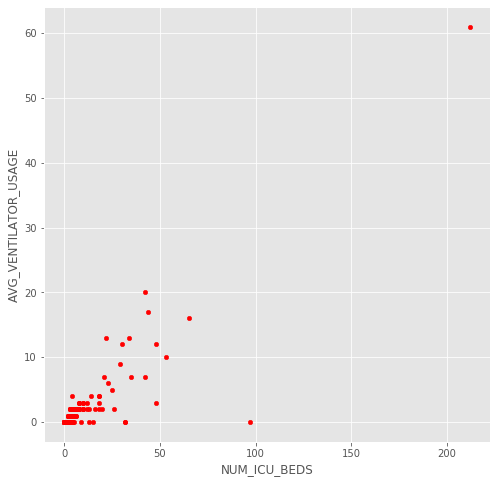

In [61]:
MN.plot(kind='scatter',x='NUM_ICU_BEDS',y='AVG_VENTILATOR_USAGE',
        color='red',figsize=(8,8));

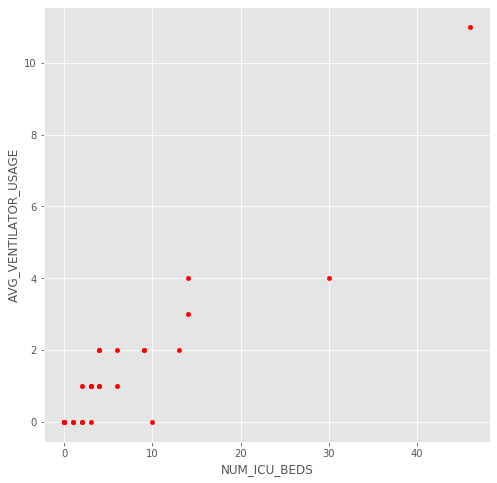

In [62]:
AK.plot(kind='scatter',x='NUM_ICU_BEDS',y='AVG_VENTILATOR_USAGE',
        color='red',figsize=(8,8));

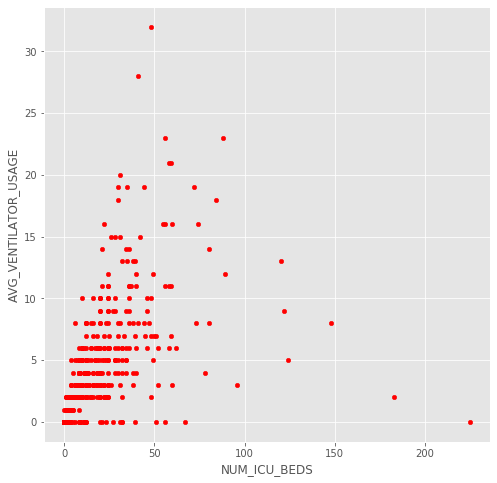

In [63]:
CA.plot(kind='scatter',x='NUM_ICU_BEDS',y='AVG_VENTILATOR_USAGE',
        color='red',figsize=(8,8));

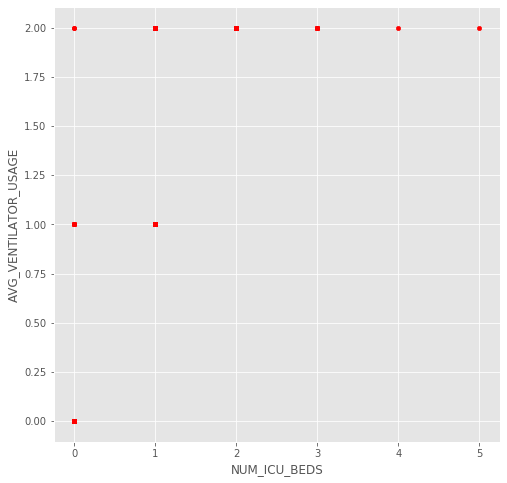

In [64]:
VAhosp.plot(kind='scatter',x='NUM_ICU_BEDS',y='AVG_VENTILATOR_USAGE',
        color='red',figsize=(8,8));

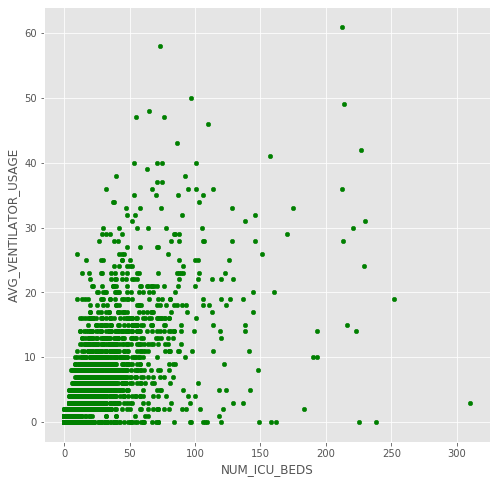

In [65]:
hospitals.plot(kind='scatter',x='NUM_ICU_BEDS', y='AVG_VENTILATOR_USAGE',
        color='green',figsize=(8,8));

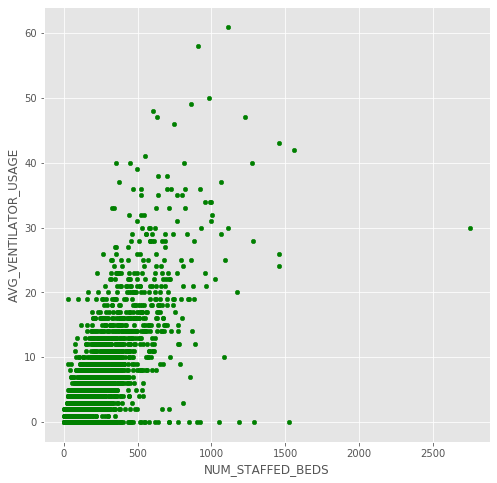

In [66]:
hospitals.plot(kind='scatter',x='NUM_STAFFED_BEDS', y='AVG_VENTILATOR_USAGE',
        color='green',figsize=(8,8));

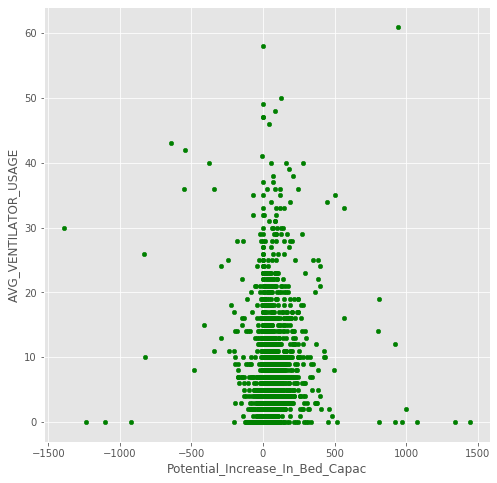

In [67]:
hospitals.plot(kind='scatter',x='Potential_Increase_In_Bed_Capac', y='AVG_VENTILATOR_USAGE',
        color='green',figsize=(8,8));

5. Correlation Plots using Seaborn library

In [68]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

C:\Users\pytho\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [69]:
#install heatmapz
!pip install heatmapz

In [70]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

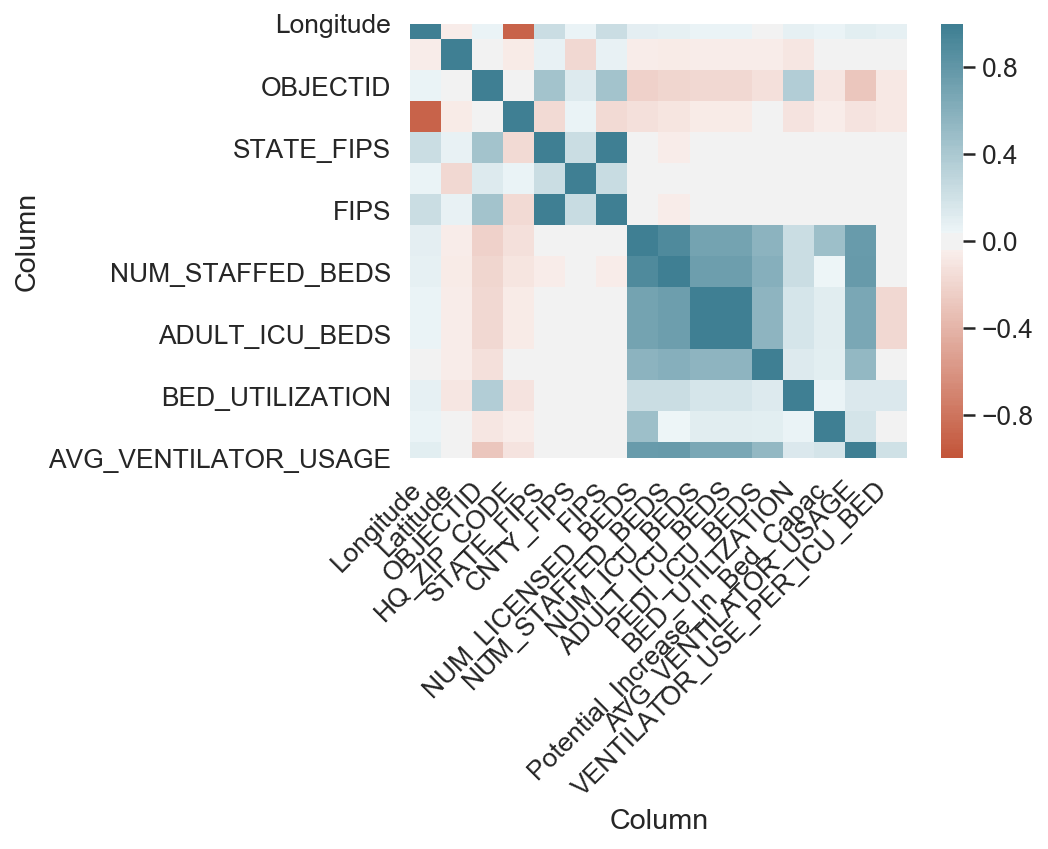

In [71]:
#Let's create a correlation matrix for the hospitals dataframe
#Green means positive, red means negative. The stronger the color, the larger the correlation magnitude.
corr = hospitals.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');


# Linear Regression: Number of ICU Beds vs. Average Ventilator Usage

In [72]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
hospitals.head()

Column,Longitude,Latitude,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,VENTILATOR_USE_PER_ICU_BED
0,-81.510688,41.133034,3001,Western Reserve Hospital (FKA Summa Western Re...,Short Term Acute Care Hospital,1900 23rd St,NaN,Cuyahoga Falls,OH,44223.0,...,39153.0,272.0,83.0,12,12,0.0,0.430764,189,2.0,0.166667
1,-81.500489,41.080189,3002,Summa Health System - Akron Campus,Short Term Acute Care Hospital,525 E Market St,NaN,Akron,OH,44304.0,...,39153.0,649.0,584.0,64,64,0.0,0.540098,65,30.0,0.468750
2,-81.589456,41.014805,3003,Summa Health System - Barberton Campus,Short Term Acute Care Hospital,155 5th St Ne,NaN,Barberton,OH,44203.0,...,39153.0,271.0,158.0,12,12,0.0,0.628819,113,0.0,0.000000
3,-81.532470,41.078325,3004,Akron General,Short Term Acute Care Hospital,1 Akron General Ave,NaN,Akron,OH,44307.0,...,39153.0,383.0,383.0,34,34,0.0,0.706661,0,10.0,0.294118
4,-81.513552,41.096977,3005,Crystal Clinic Orthopaedic Center,Short Term Acute Care Hospital,444 N Main St,NaN,Akron,OH,44310.0,...,39153.0,94.0,59.0,10,10,0.0,0.431066,35,2.0,0.200000


In [74]:
# Import LinearRegression from sklearn.linear_model.
from sklearn.linear_model import LinearRegression

In [75]:
# Set up X and y variables.

y = hospitals['AVG_VENTILATOR_USAGE']  # y = output, what we want to predict
X = hospitals[['NUM_ICU_BEDS']]  # X = inputs, what we use in order to predict y




In [76]:
print(X.shape)
#1 predictor, 6593 rows

(6593, 1)


In [77]:
X.head()

Column,NUM_ICU_BEDS
0,12
1,64
2,12
3,34
4,10


Build Linear Regression Model 

In [78]:
# First, we instantiate our model.
model = LinearRegression()

In [79]:
# Next, we fit our model to our data.
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# After fitting our model, we can generate predictions.
predictions = model.predict(X)

In [81]:
def MSE(y_true, y_hat):
    diff = y_true - y_hat
    squared_diff = diff**2
    return np.mean(squared_diff)

In [82]:
# Finally, let's evaluate our model.
MSE(y,predictions)

16.11114100488584

In [83]:
# Calculate the value of beta_0.
model.intercept_

1.219453892644427

In [84]:
# Calculate the value of beta_1.
model.coef_

array([0.16453415])

In [85]:
from sklearn.metrics import r2_score

print(r2_score(y, predictions))

0.4595571323665034


Interpretation of coefficient: As the number of ICU beds increases by 1, the average ventilator use increases by 0.16. Most studies are saying that 30-40% of people with covid end up on a ventilator. 

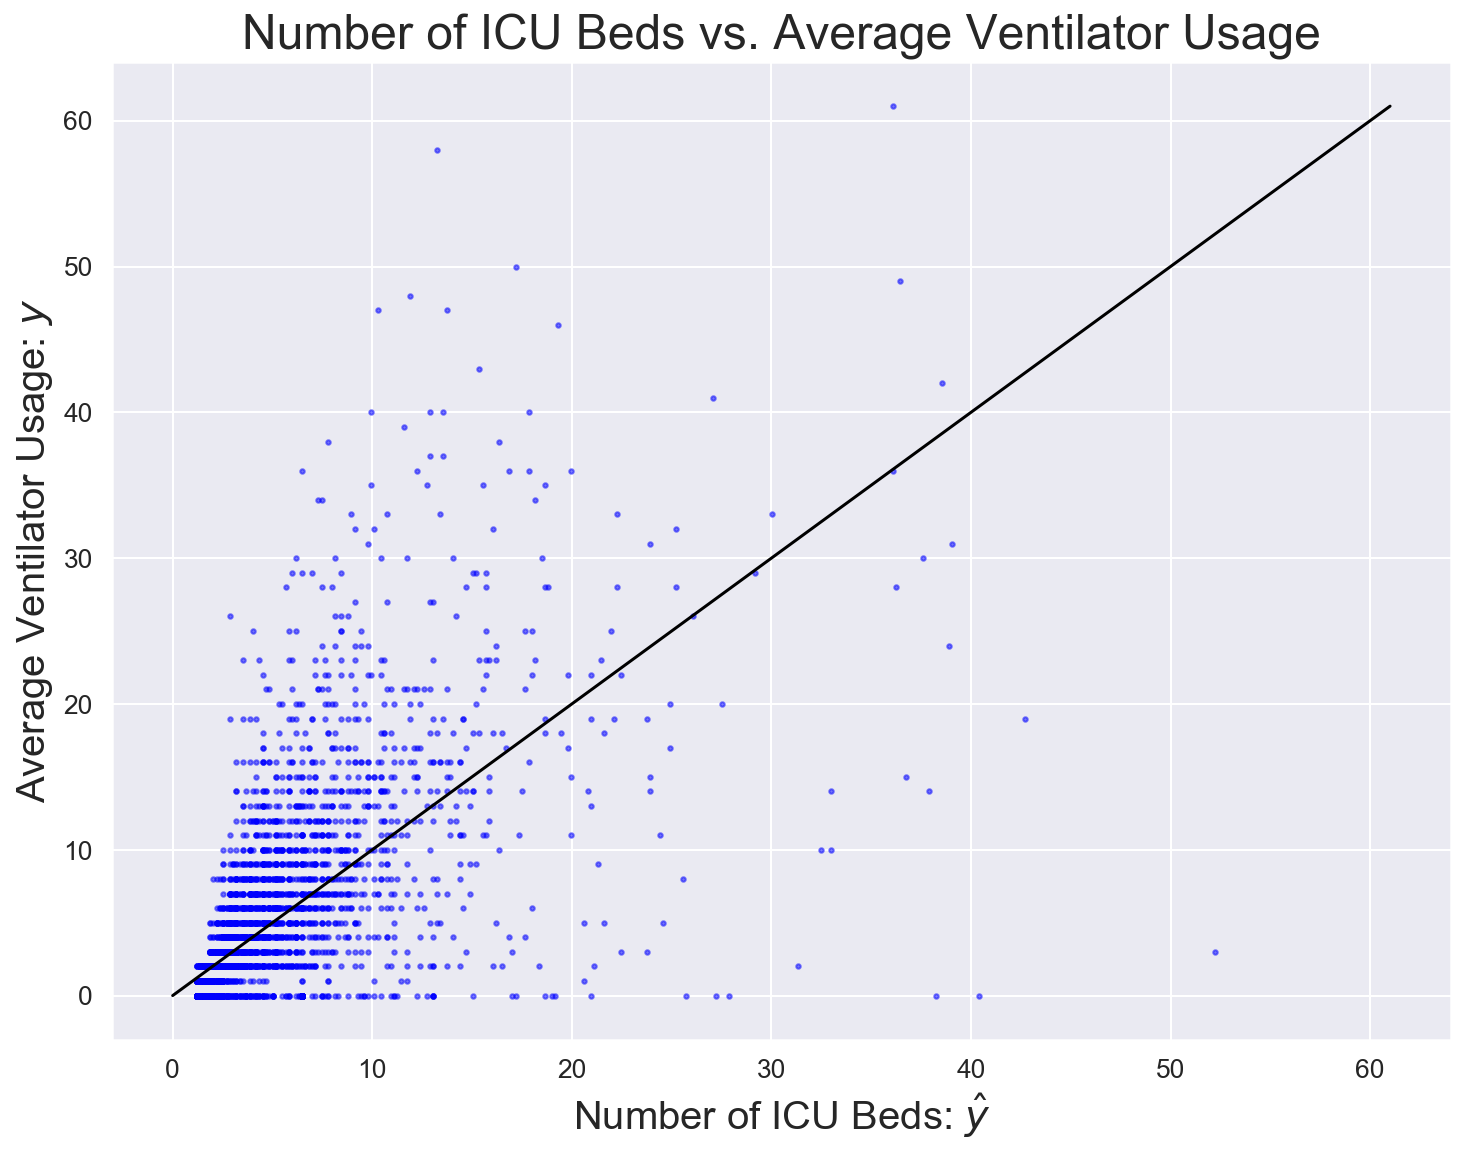

In [86]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(predictions, y, s=5, color='blue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Number of ICU Beds: $\hat{y}$", fontsize = 20)
plt.ylabel("Average Ventilator Usage: $y$", fontsize = 20)
plt.title('Number of ICU Beds vs. Average Ventilator Usage', fontsize = 24);

In [87]:
#comparison of linear regression models for each dataframe. Create dataframe with dictionary. 
hospitaldata= {
    'MSE':[16.1,31.4,16.8,8.3,0.3,0.64],
    'Intercept B0':[1.21,1.5,2.3,-0.05,0.46,0.04],
    'Coef B1':[0.16,0.2,0.1,0.23,0.67,0.20]
}

In [88]:
#Data frame created for each subdata frame linear regression result. 
dfobj=pd.DataFrame(hospitaldata)
dfobj

,MSE,Intercept B0,Coef B1
0,16.10,1.21,0.16
1,31.40,1.50,0.20
2,16.80,2.30,0.10
3,8.30,-0.05,0.23
4,0.30,0.46,0.67
5,0.64,0.04,0.20


In [89]:
#compute RMSE 
dfobj['RMSE']=np.sqrt(dfobj['MSE'])
dfobj

,MSE,Intercept B0,Coef B1,RMSE
0,16.10,1.21,0.16,4.012481
1,31.40,1.50,0.20,5.603570
2,16.80,2.30,0.10,4.098780
3,8.30,-0.05,0.23,2.880972
4,0.30,0.46,0.67,0.547723
5,0.64,0.04,0.20,0.800000


In [90]:
dfobj2=dfobj.reset_index()
dfobj2

,index,MSE,Intercept B0,Coef B1,RMSE
0,0,16.10,1.21,0.16,4.012481
1,1,31.40,1.50,0.20,5.603570
2,2,16.80,2.30,0.10,4.098780
3,3,8.30,-0.05,0.23,2.880972
4,4,0.30,0.46,0.67,0.547723
5,5,0.64,0.04,0.20,0.800000


In [91]:
#Rename rows by corresponding data frame label
dfobj3=dfobj2.rename(index={0:'Hospitals',1:'NY',2:'CA',3:'MN',4:'VAHosp',5:'AK'})
dfobj3

,index,MSE,Intercept B0,Coef B1,RMSE
Hospitals,0,16.10,1.21,0.16,4.012481
NY,1,31.40,1.50,0.20,5.603570
CA,2,16.80,2.30,0.10,4.098780
MN,3,8.30,-0.05,0.23,2.880972
VAHosp,4,0.30,0.46,0.67,0.547723
AK,5,0.64,0.04,0.20,0.800000


Interpretation of Results based on coefficient:
1. Hospitals: for every 1 increase in ICU beds, there is 0.16 increase in ventilator usage.
2. NY: for every 1 increase in ICU beds, there is 0.20 increase in ventilator usage.
3. CA: for every 1 increase in ICU beds, there is 0.10 increase in ventilator usage.
4. MN: for every 1 increase in ICU beds, there is 0.23 increase in ventilator usage.
5. VAhosp: for every 1 increase in ICU beds, there is 0.67 increase in ventilator usage. 
6. AK: for every 1 increase in ICU beds, there is 0.20 increase in ventilator usage. 

It appears the VA hospitals have the most predicted increase in ventilator usage per ICU bed. The VA hospitals have the least number of ICU beds so this makes sense. 

The best fit model based on RMSE value is the VA Hospitals. Again less beds and less ventilators available so this makes sense. 

# Linear Regression: Average Ventilator Usage vs. Number of ICU Beds, Number of Staffed Beds and Potential Increase in Bed Capacity

In [92]:
# Set up our X and y variables.

y = hospitals['AVG_VENTILATOR_USAGE'] # y = what we want to predict
X = hospitals[['NUM_ICU_BEDS','NUM_STAFFED_BEDS','Potential_Increase_In_Bed_Capac']] # X = what we use to predict y



In [93]:
# Instantiate our model.
model = LinearRegression()

In [94]:
# Fit our model.
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
# Generate predictions.
predictions = model.predict(X)

In [96]:
# Evaluate our model's performance.
MSE(y, predictions)

10.873763175926927

In [97]:
# Print out the model coefficients.
model.coef_


array([0.0494955 , 0.02093329, 0.00928162])

Interpretation of coefficient:
    1. For every 1 increase in ICU beds there is a 0.049 increase in Avg Ventilator Usage.
    2. For every 1 increase in Number of Staffed hospital beds there is a 0.021 increase in Avg Ventilator Usage.
    3. For every 1 increase in Potential Bed Capacity there is a 0.009 increase in Avg Ventilator Usage.
Summary: Number of ICU beds is a better predictor of average increase in ventilator usage which makes sense since most ventilators are used in ICU beds, although it seems number of staffed beds is not far behind. 

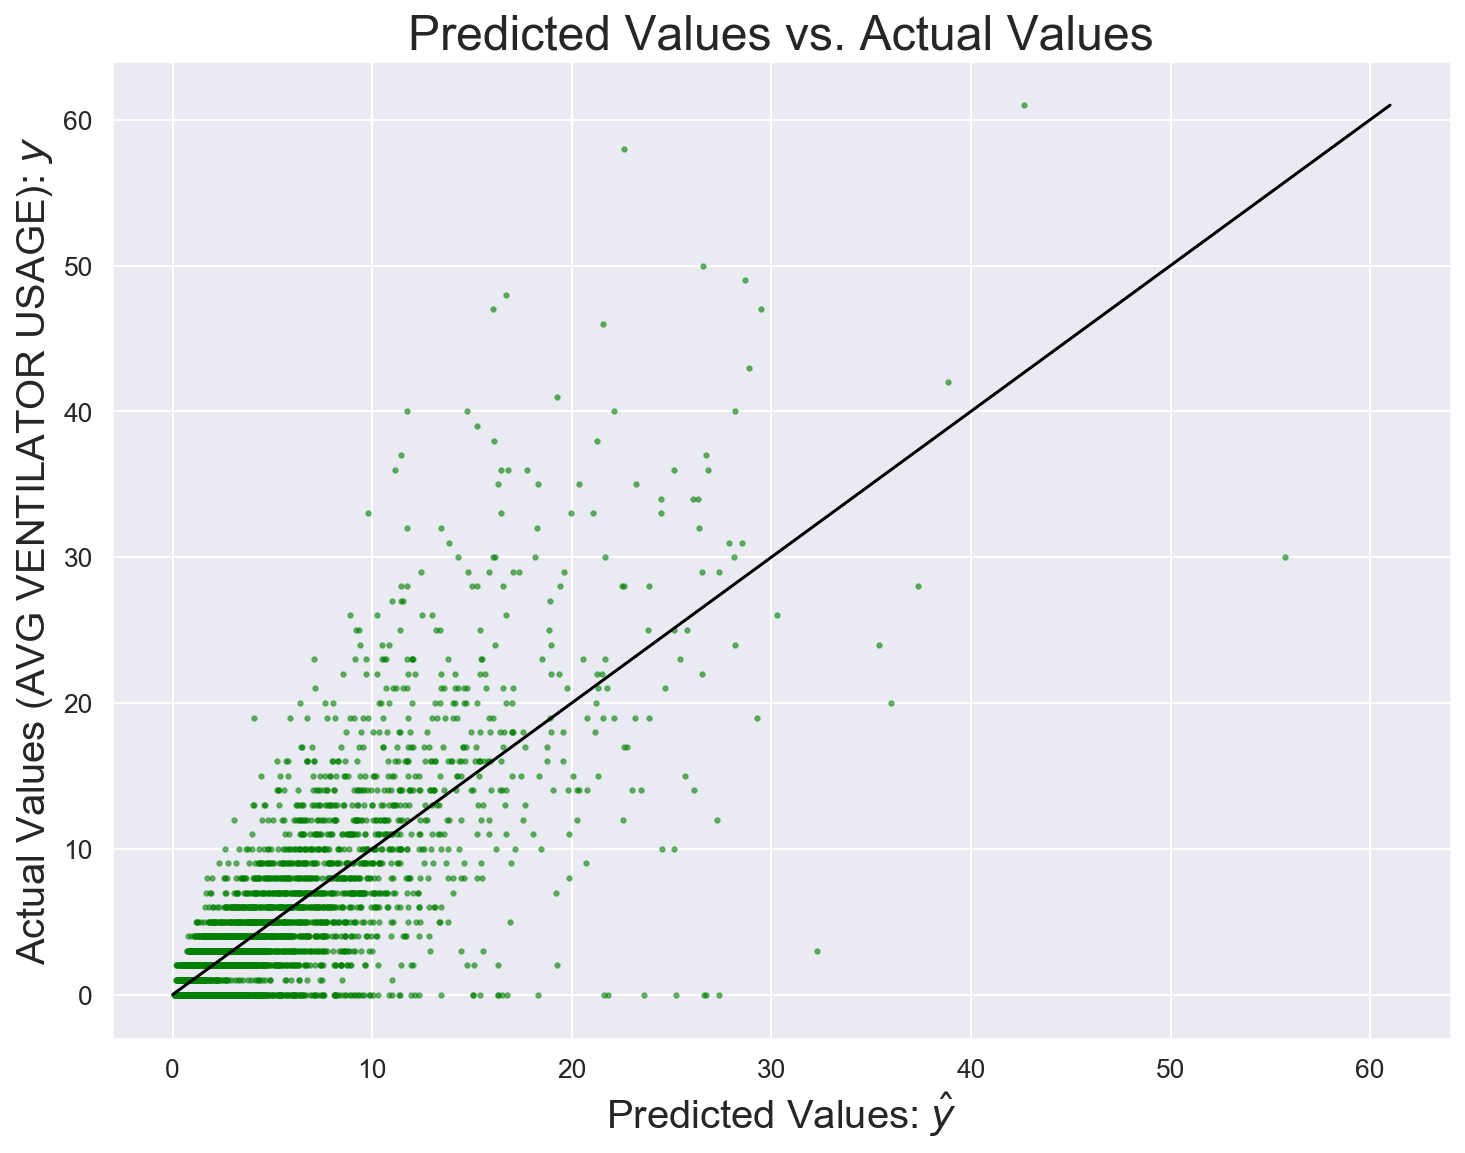

In [98]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(predictions, y, s=5, color='green', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values (AVG VENTILATOR USAGE): $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [99]:
from sklearn.metrics import r2_score

print(r2_score(y, predictions))

0.6352432300739401


# A comparison of all y predictor variables for NY, CA, MN,VAHosp, AK

In [100]:
#comparison of linear regression models for each dataframe. Create dataframe with dictionary. 
multipleregress= {
    'MSE':[10.87,18.97,13.71,4.89,0.30,0.515],
    'Coef ICU':[0.049,0.09,0.05,0.19,6.7,0.13],
    'Coef Staff':[0.02,0.02,0.012,0.01,-6.74,0.009],
    'Coef Pot Inc':[0.009,0.008,0.014,-0.010,-2.56,0.007]
}

In [101]:
#Data frame created for each subdata frame linear regression result. 
dfmult=pd.DataFrame(multipleregress)
dfmult

,MSE,Coef ICU,Coef Staff,Coef Pot Inc
0,10.870,0.049,0.020,0.009
1,18.970,0.090,0.020,0.008
2,13.710,0.050,0.012,0.014
3,4.890,0.190,0.010,-0.010
4,0.300,6.700,-6.740,-2.560
5,0.515,0.130,0.009,0.007


In [102]:
#compute RMSE 
dfmult['RMSE']=np.sqrt(dfobj['MSE'])
dfmult

,MSE,Coef ICU,Coef Staff,Coef Pot Inc,RMSE
0,10.870,0.049,0.020,0.009,4.012481
1,18.970,0.090,0.020,0.008,5.603570
2,13.710,0.050,0.012,0.014,4.098780
3,4.890,0.190,0.010,-0.010,2.880972
4,0.300,6.700,-6.740,-2.560,0.547723
5,0.515,0.130,0.009,0.007,0.800000


In [103]:
dfmult2=dfmult.reset_index()
dfmult2

,index,MSE,Coef ICU,Coef Staff,Coef Pot Inc,RMSE
0,0,10.870,0.049,0.020,0.009,4.012481
1,1,18.970,0.090,0.020,0.008,5.603570
2,2,13.710,0.050,0.012,0.014,4.098780
3,3,4.890,0.190,0.010,-0.010,2.880972
4,4,0.300,6.700,-6.740,-2.560,0.547723
5,5,0.515,0.130,0.009,0.007,0.800000


In [104]:
#Rename rows by corresponding data frame label
dfmult3=dfmult2.rename(index={0:'Hospitals',1:'NY',2:'CA',3:'MN',4:'VAHosp',5:'AK'})
dfmult3

,index,MSE,Coef ICU,Coef Staff,Coef Pot Inc,RMSE
Hospitals,0,10.870,0.049,0.020,0.009,4.012481
NY,1,18.970,0.090,0.020,0.008,5.603570
CA,2,13.710,0.050,0.012,0.014,4.098780
MN,3,4.890,0.190,0.010,-0.010,2.880972
VAHosp,4,0.300,6.700,-6.740,-2.560,0.547723
AK,5,0.515,0.130,0.009,0.007,0.800000


Summary of models based on coefficient scores:
1. The VA Hospitals continue to show that for every 1 increase in ICU beds there is 6.7 increase in ventilator usage, for every 1 increase in number of staffed beds there is actually a -6.7 decrease in ventilator usage, and for every 1 potential increase in bed capacity there is -2.5 decrease in ventilator usage. Again the VA hospitals have lower number of beds and ventilators so this makes sense. 

2. For this model the ranked order of increase in 1 ICU bed for increase in avg ventilator usage is: VA Hospitals, AK, NY, CA, All hospitals, and MN. 

3. Ranked order of increase in 1 staffed bed for increase in ventilator usage: All hospitals is tied with NY, then CA, MN, AK, VA hospitals. 

4. Ranked order of potential increase in 1 bed for ventilator usage: CA, All hospitals, NY, AK, MN, and VA hospitals. 

The best fit model based on RMSE is the VA Hospitals. They have less number of beds and less number of ventilators and are more than likely "maxed out at capacity" so this makes sense. 

# NY.gov COVID-19 Testing API Data Set

In [105]:
import pandas as pd

In [106]:
#Read/Import API URL from ny.gov website
url = "https://health.data.ny.gov/resource/xdss-u53e.json"

In [107]:
#read JSON API file
covid=pd.read_json(url,orient='columns')

In [108]:
covid.head()

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
0,2020-04-29T00:00:00.000,Albany,98,1165,439,10310
1,2020-04-29T00:00:00.000,Allegany,0,35,18,543
2,2020-04-29T00:00:00.000,Bronx,644,37244,2977,90231
3,2020-04-29T00:00:00.000,Broome,11,284,114,2361
4,2020-04-29T00:00:00.000,Cattaraugus,0,47,85,909


In [109]:
#How many null values in data frame?
covid.isnull().sum()

test_date                         0
county                            0
new_positives                     0
cumulative_number_of_positives    0
total_number_of_tests             0
cumulative_number_of_tests        0
dtype: int64

In [110]:
#Assess shape of data frame
covid.shape

(1000, 6)

In [111]:
#Look at data types
covid.dtypes

test_date                         object
county                            object
new_positives                      int64
cumulative_number_of_positives     int64
total_number_of_tests              int64
cumulative_number_of_tests         int64
dtype: object

In [112]:
#Change test_date from object to datetime
covid['test_date'] = pd.to_datetime(covid['test_date'])
covid.dtypes


test_date                         datetime64[ns]
county                                    object
new_positives                              int64
cumulative_number_of_positives             int64
total_number_of_tests                      int64
cumulative_number_of_tests                 int64
dtype: object

In [113]:
#Bronx Data Frame
Bronx=covid[covid['county']== 'Bronx']
Bronx.head()

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
2,2020-04-29,Bronx,644,37244,2977,90231
64,2020-04-28,Bronx,606,36600,2938,87254
126,2020-04-27,Bronx,438,35994,2107,84316
188,2020-04-26,Bronx,586,35556,2363,82209
250,2020-04-25,Bronx,787,34970,2967,79846


In [114]:
#Queens Data Frame
Queens=covid[covid['county']=='Queens']
Queens.head()

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
40,2020-04-29,Queens,890,51631,4201,120689
102,2020-04-28,Queens,812,50741,4061,116488
164,2020-04-27,Queens,530,49929,2628,112427
226,2020-04-26,Queens,654,49399,2829,109799
288,2020-04-25,Queens,884,48745,3676,106970


In [115]:
#Manhattan Data Frame
Manhattan=covid[covid['county']=='New York']
Manhattan.head()

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
30,2020-04-29,New York,316,21920,2299,66602
92,2020-04-28,New York,292,21604,2260,64303
154,2020-04-27,New York,215,21312,1650,62043
216,2020-04-26,New York,324,21097,2007,60393
278,2020-04-25,New York,493,20773,2354,58386


In [116]:
#Brooklyn Data Frame
Brooklyn=covid[covid['county']=='Kings']
Brooklyn.head()

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
23,2020-04-29,Kings,636,44872,3944,111490
85,2020-04-28,Kings,649,44236,3873,107546
147,2020-04-27,Kings,573,43587,2940,103673
209,2020-04-26,Kings,527,43014,2684,100733
271,2020-04-25,Kings,827,42487,3685,98049


In [117]:
#Nassau County Data Frame
Nassau=covid[covid['county']=='Nassau']
Nassau.head()

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
29,2020-04-29,Nassau,349,35854,2424,95200
91,2020-04-28,Nassau,420,35505,2509,92776
153,2020-04-27,Nassau,220,35085,1499,90267
215,2020-04-26,Nassau,343,34865,1871,88768
277,2020-04-25,Nassau,724,34522,3334,86897


In [118]:
#Staten Island Data Frame 
StatenIsland=covid[covid['county']=='Richmond']
StatenIsland.head()

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
42,2020-04-29,Richmond,151,11811,841,33486
104,2020-04-28,Richmond,144,11660,935,32645
166,2020-04-27,Richmond,93,11516,567,31710
228,2020-04-26,Richmond,140,11423,658,31143
290,2020-04-25,Richmond,154,11283,882,30485


In [119]:
#Westchester County Data Frame 
Westchester=covid[covid['county']=='Westchester']
Westchester.head()

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
59,2020-04-29,Westchester,344,28970,1842,92829
121,2020-04-28,Westchester,381,28626,1843,90987
183,2020-04-27,Westchester,238,28245,1408,89144
245,2020-04-26,Westchester,343,28007,1764,87736
307,2020-04-25,Westchester,433,27664,1951,85972


In [120]:
#Staten Island Data Frame 
Rockland=covid[covid['county']=='Rockland']
Rockland.head()

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
43,2020-04-29,Rockland,122,11708,691,30593
105,2020-04-28,Rockland,133,11586,528,29902
167,2020-04-27,Rockland,87,11453,537,29374
229,2020-04-26,Rockland,110,11366,565,28837
291,2020-04-25,Rockland,165,11256,677,28272


# NYC and Nassau County (Long Island) cumulative number of positive covid-19 tests by date

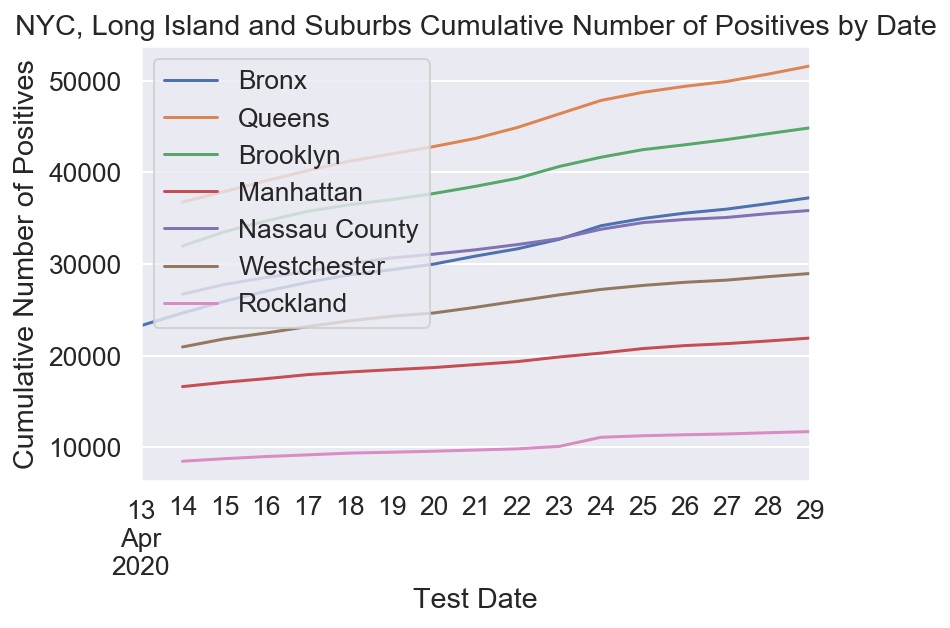

In [121]:
#NYC, Long Island and Suburbs cumulative number of positive covid-19 tests by date
Bronx.groupby('test_date').agg('sum')['cumulative_number_of_positives'].plot();
Queens.groupby('test_date').agg('sum')['cumulative_number_of_positives'].plot();
Brooklyn.groupby('test_date').agg('sum')['cumulative_number_of_positives'].plot();
Manhattan.groupby('test_date').agg('sum')['cumulative_number_of_positives'].plot();
Nassau.groupby('test_date').agg('sum')['cumulative_number_of_positives'].plot();
Westchester.groupby('test_date').agg('sum')['cumulative_number_of_positives'].plot();
Rockland.groupby('test_date').agg('sum')['cumulative_number_of_positives'].plot();
plt.title('NYC, Long Island and Suburbs Cumulative Number of Positives by Date');
plt.xlabel('Test Date');
plt.ylabel('Cumulative Number of Positives');
plt.legend(['Bronx','Queens','Brooklyn','Manhattan','Nassau County','Westchester','Rockland']);

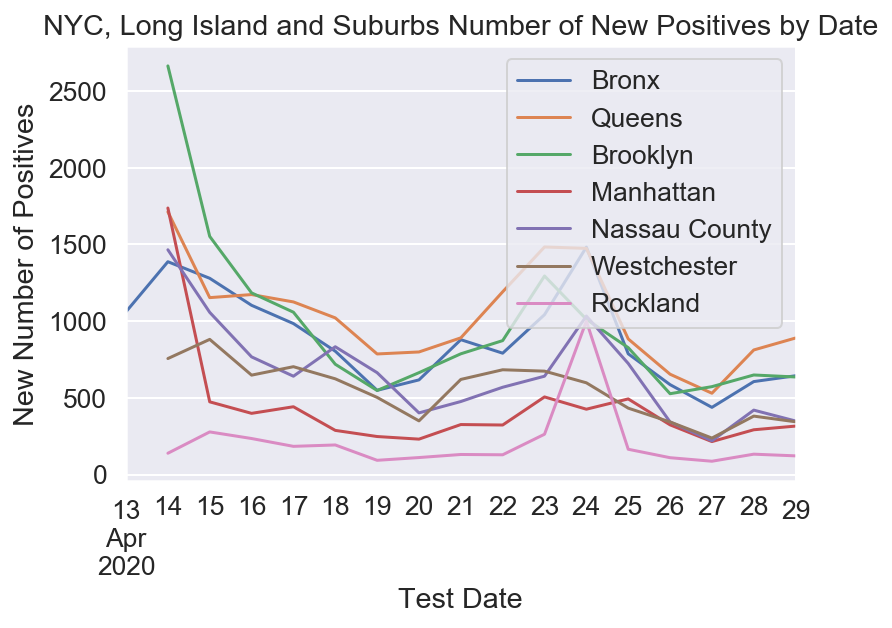

In [122]:
#NYC, Long Island and Suburbs number of new positive covid-19 tests by date
Bronx.groupby('test_date').agg('sum')['new_positives'].plot();
Queens.groupby('test_date').agg('sum')['new_positives'].plot();
Brooklyn.groupby('test_date').agg('sum')['new_positives'].plot();
Manhattan.groupby('test_date').agg('sum')['new_positives'].plot();
Nassau.groupby('test_date').agg('sum')['new_positives'].plot();
Westchester.groupby('test_date').agg('sum')['new_positives'].plot();
Rockland.groupby('test_date').agg('sum')['new_positives'].plot();
plt.title('NYC, Long Island and Suburbs Number of New Positives by Date');
plt.xlabel('Test Date');
plt.ylabel('New Number of Positives');
plt.legend(['Bronx','Queens','Brooklyn','Manhattan','Nassau County','Westchester','Rockland']);

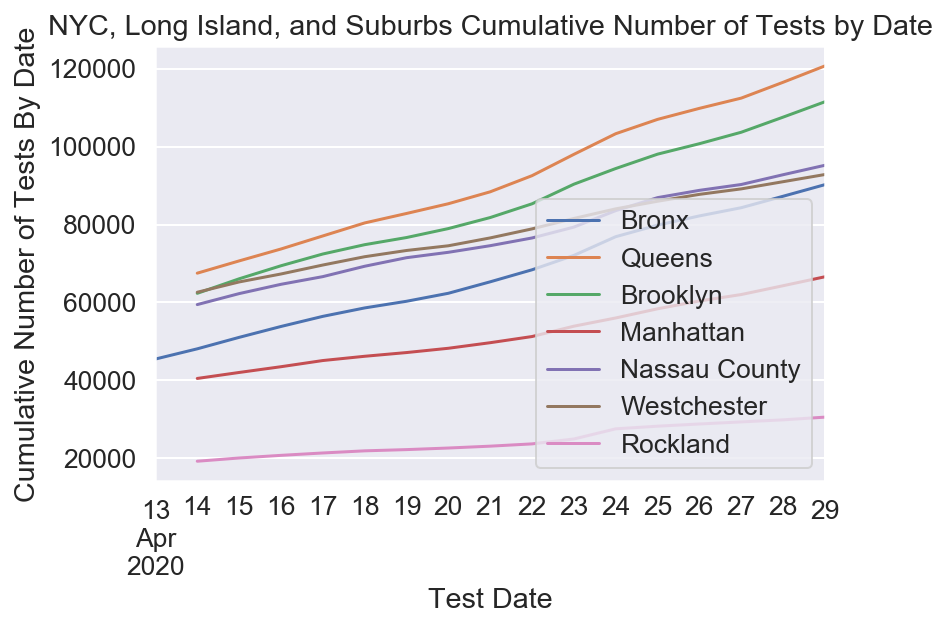

In [123]:
#NYC, Long Island and Suburbs cumulative number of covid-19 tests by date
Bronx.groupby('test_date').agg('sum')['cumulative_number_of_tests'].plot();
Queens.groupby('test_date').agg('sum')['cumulative_number_of_tests'].plot();
Brooklyn.groupby('test_date').agg('sum')['cumulative_number_of_tests'].plot();
Manhattan.groupby('test_date').agg('sum')['cumulative_number_of_tests'].plot();
Nassau.groupby('test_date').agg('sum')['cumulative_number_of_tests'].plot();
Westchester.groupby('test_date').agg('sum')['cumulative_number_of_tests'].plot();
Rockland.groupby('test_date').agg('sum')['cumulative_number_of_tests'].plot();
plt.title('NYC, Long Island, and Suburbs Cumulative Number of Tests by Date');
plt.xlabel('Test Date');
plt.ylabel('Cumulative Number of Tests By Date');
plt.legend(['Bronx','Queens','Brooklyn','Manhattan','Nassau County','Westchester','Rockland']);

# Scatter plots of NY State covid testing data

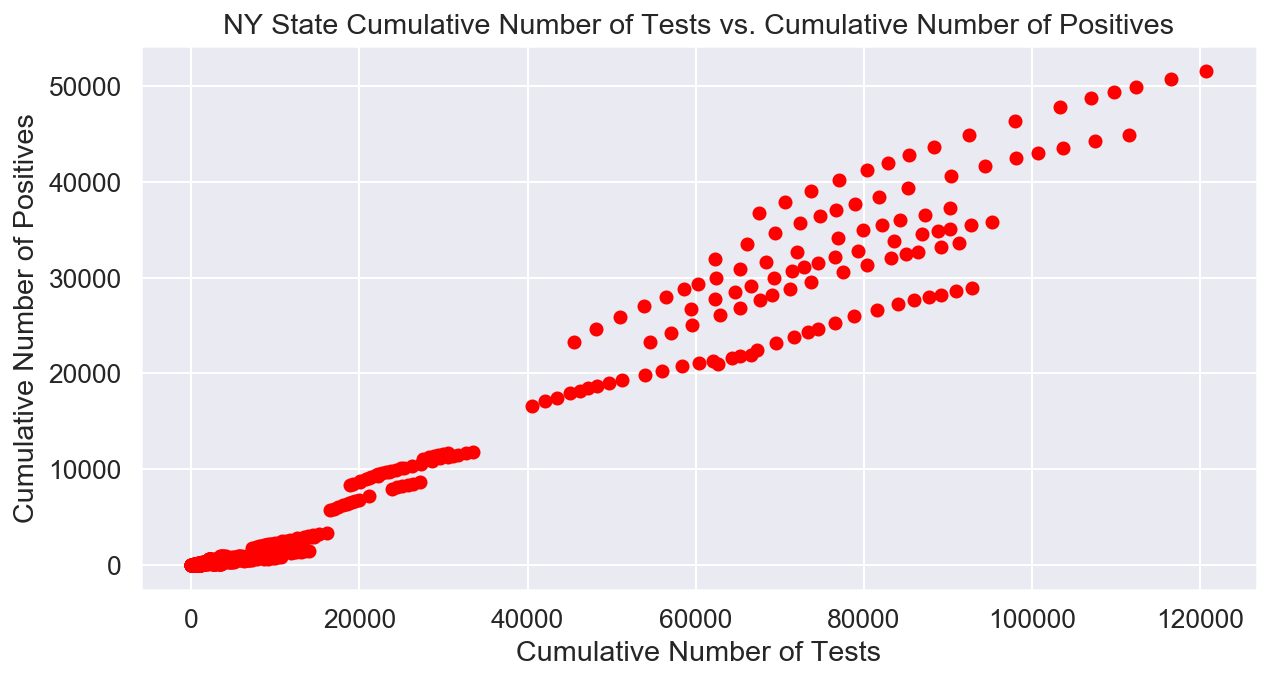

In [124]:
# Create a figure.
plt.figure(figsize=(10,5))

# Generate a scatterplot of depth versus price.
plt.scatter(covid['cumulative_number_of_tests'],
           covid['cumulative_number_of_positives'],
           color='red');
plt.title('NY State Cumulative Number of Tests vs. Cumulative Number of Positives');
plt.xlabel('Cumulative Number of Tests');
plt.ylabel('Cumulative Number of Positives');

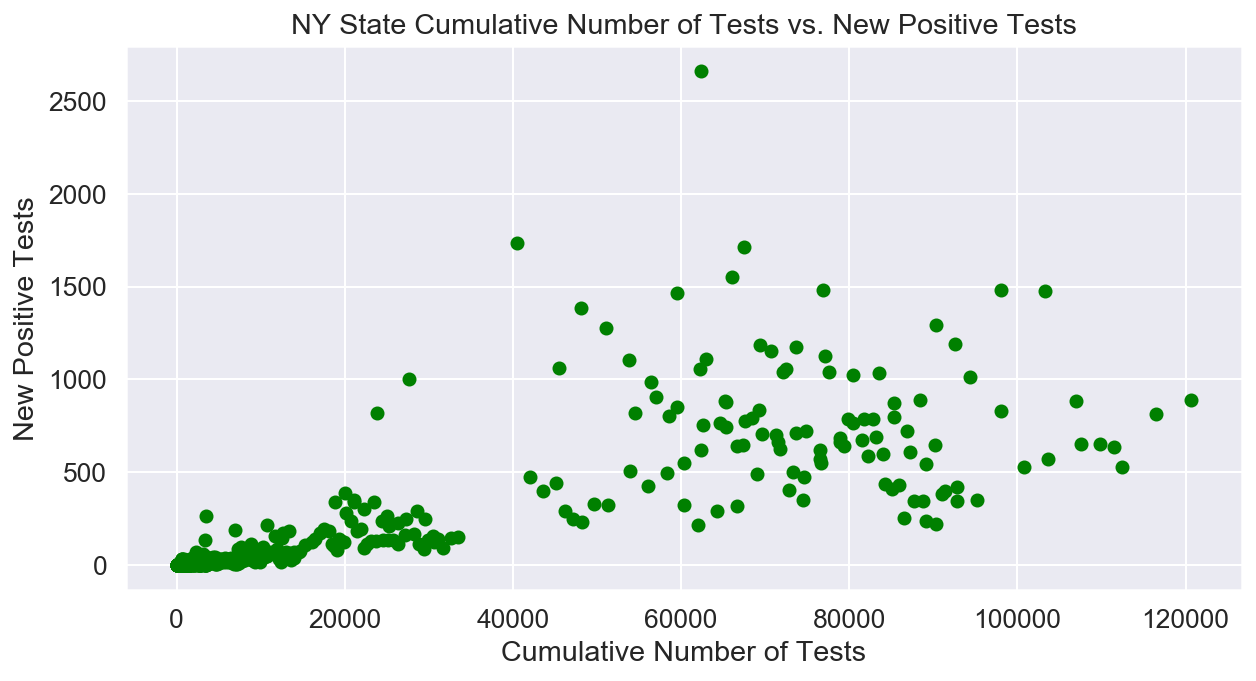

In [125]:
# Create a figure.
plt.figure(figsize=(10,5))

# Generate a scatterplot of depth versus price.
plt.scatter(covid['cumulative_number_of_tests'],
           covid['new_positives'],
           color='green');
plt.title('NY State Cumulative Number of Tests vs. New Positive Tests');
plt.xlabel('Cumulative Number of Tests');
plt.ylabel('New Positive Tests');

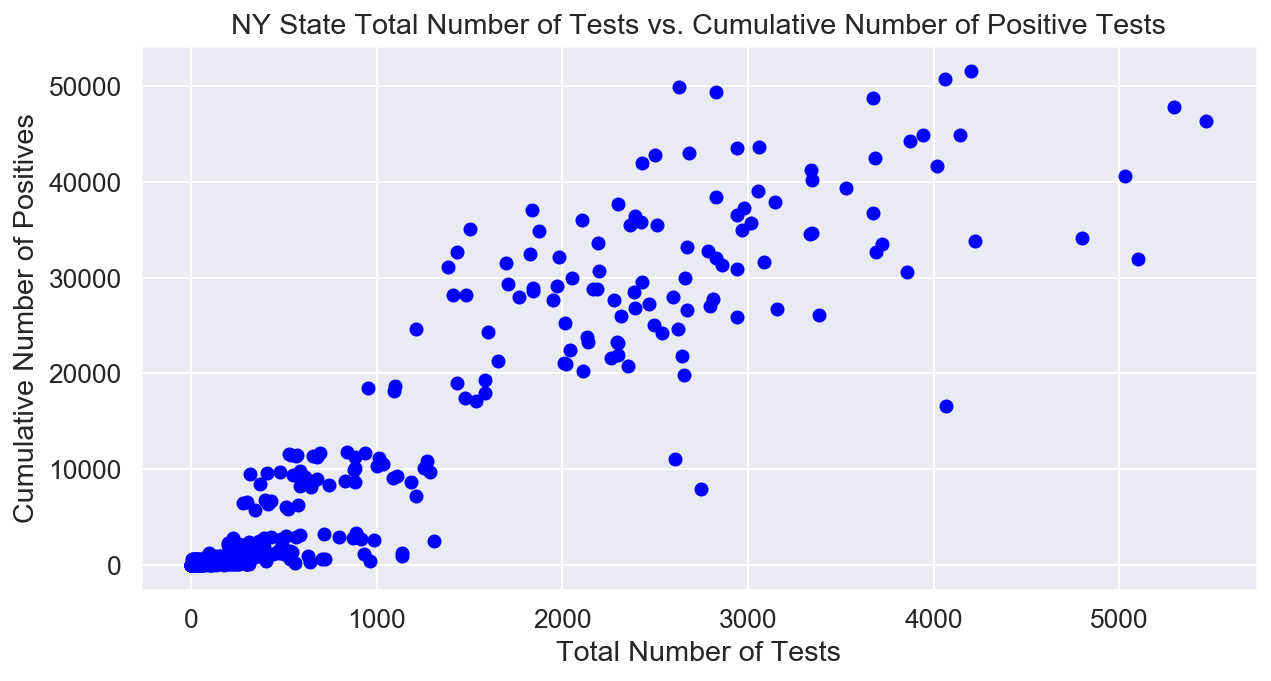

In [126]:
# Create a figure.
plt.figure(figsize=(10,5))

# Generate a scatterplot of depth versus price.
plt.scatter(covid['total_number_of_tests'],
           covid['cumulative_number_of_positives'],
           color='blue');
plt.title('NY State Total Number of Tests vs. Cumulative Number of Positive Tests');
plt.xlabel('Total Number of Tests');
plt.ylabel('Cumulative Number of Positives');

# Linear Regression: COVID-19 New Positives predicted by total number of tests, cumulative number of tests, and cumulative number of positives

In [127]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [128]:
# Set up X and y variables.

y = covid['new_positives'] # y = what we want to predict
X = covid[['total_number_of_tests','cumulative_number_of_tests','cumulative_number_of_positives']] # X = what we use to predict y

# y is usually lower-case because it's only one column
# X is usually upper-case because it's usually multiple columns

In [129]:
X.shape

(1000, 3)

In [130]:
y.shape

(1000,)

In [131]:
#Instatiate model
model=LinearRegression()

In [132]:
#Fit the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
#Generate Predictions
predictions=model.predict(X)

In [141]:
#Evaluate Model's performance
meansqerror=MSE(y,predictions)
meansqerror

5042.0810955020115

In [142]:
#Calculate RMSE
RMSE=np.sqrt(meansqerror)
RMSE

71.0076129404588

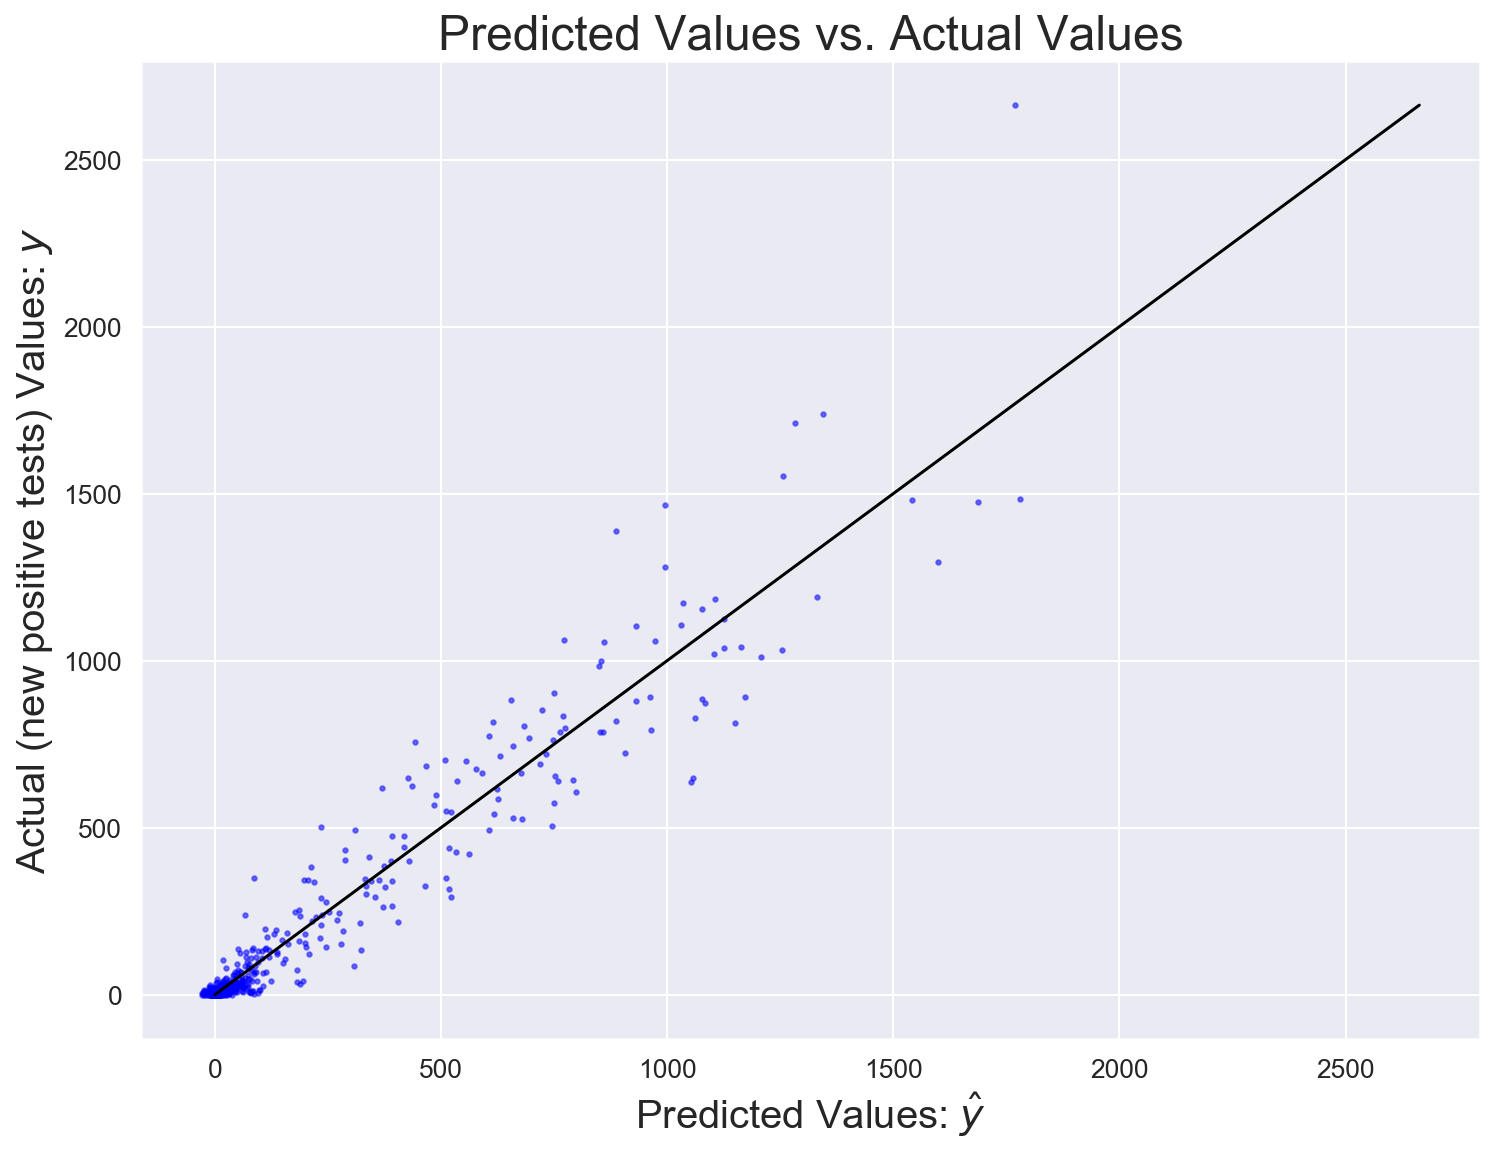

In [143]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(predictions, y, s=5, color='blue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual (new positive tests) Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [144]:
# Print out the model coefficients:total number of tests, cumulative number of tests, cumulative number of positives
model.coef_

array([ 0.36271171, -0.0108934 ,  0.01861269])

The coefficient tells you how much the dependent variable (new positive tests) is expected to increase when that independent variable increases by one.
1. As the number of tests increases by 1, the number of new positives increases by 0.36.
2. As the cumulative number of tests increases by 1, the number of new positives decreases by .011.
3. As the cumulative number of positives increases by 1, the number of new positives increases by 0.021.

Summary: As the cumulative number of tests increases by 1 the number of new positives is predicted to start to decrease by .011. Overall the number of new positive tests will have small increases as the cumulative number of positives increase, but a slighty larger increase (0.36) as the number of tests increases. 
Is this a sign the curve is starting to flatten in NY State? 

In [146]:
len(y),
len(predictions)

1000

In [139]:
from sklearn.metrics import r2_score

print(r2_score(y, predictions))

0.9318610992524522


# THE END. THANK YOU!